**Author:** Summer </br>
**Task:** 2D footprint clustering

## **Overview**
This exercise is to reproduce the methodologies in [Duong et al. (2023)](https://doi.org/10.1145/3615900.3628790). The paper discusses the potential of using the concepts of graph similarity and spectral clustering to cluster a set of building footprints based on similarities of their shape characteristics. The authors suggest that a geometric graph distance, rooted in Wasserstein distance from transportation theory, is capable of capturing the graph structure as well as the spatial properties of the geometric graph. The methods and algorithm were tested on dataset from Boston, focusing on two sites: South End and Roxbury area, where they mainly have *row buildings, standalone houses, larger complex buildings, as well as equal sized buildings of similar shapes*. The results were validated through a small user study, and also compared with an existing feature-based clustering method. Future work is required to further the stability of the proposed similarity measure and to confirm the findings with more extensive experiments. Below is the workflow of the proposed method (Figure 1).

![alt text](./images/model_components.png)

*Figure 1 Model components and the parameters on the left hand side (Source: [Duong et al., 2023](https://doi.org/10.1145/3615900.3628790)).*

**Important Concepts**

- **Medial axis**: This is the symmetric, skeletal structure of a geometric shape, such as a building footprint. The medial axis of a polygon refers to the set of points inside the building footprint that are equidistant to at least two different points on the boundary of the polygon (Figure 2).


<img src="./images/examples_medial_axis.png" alt="alt text" width="400" height="300"/> </br>
*Figure 2 Examples of medial axis (Source: [Duong et al., 2023](https://doi.org/10.1145/3615900.3628790)).* 
  
- **Medial axis transformation**: This is a technique that helps to reconstruct the original shape of polygon *P* by taking the union of all points centered at the medial axis. The points from the medial axis can be partitioned into a set of curves, following the structure of the shape and describe its symmetry. These curves and their endpoints are the *edges* and *vertices* of the Medial Axis Graph. </br>

- **Weisfeiler-Lehman Label Propogation**: To enable the comparison between graphs, the *Weisfeiler-Lehman Label Propagation* is a way to generate node labels based on the neighborhood around each node in a graph. Each node is given an initial label, and in each iteration, the current label is updated by combining its own label with the labels of its neighboring node. The idea behind is that vertices with the same initial label and with similar neighborhood structure will receive similar labels, enabling the comparison of shapes structurally using a graph method.

<img src="./images/Weisfeiler-LehmanLabelPropagation.png" alt="alt text" width="400" height="300"/> </br>
*Figure 3 One iteration of the Weisfeiler-Lehman label propogation (Source: [Duong et al., 2023](https://doi.org/10.1145/3615900.3628790)).*

- **Graph Wassertein Distance**: To compute Graph Wassertein Distance, two graphs, $G_1 = (V_1, E_1)$ and $G_2 = (V_2, E_2)$, will be compared. Specifically, the vertices in $V_1$ will be compared with the vertices in $V_2$. Note that $E$ is the edge set. During this process, a uniform weight of $ \frac{1}{|V_1|} $ is assigned to each vertex in  $V_1$, and $ \frac{1}{|V_2|} $ to each vertex in  $V_2$. Next, compute the cost matrix between vertices in $V_1$ and $V_2$ based on graph embedding, which maintains the structure of a graph while learning low-dimensional representations of its vertices. This, then, allows the matching between nodes of the two graphs.

<img src="./images/distance_computation.png" alt="alt text" width="400" height="300"/> </br>
*Figure 4 The influence of the mass of the vertices in the optimal transport problem. Vertices with similar colors in 𝐺1,𝐺2, respectively, also have a similar embedding (Source: [Duong et al., 2023](https://doi.org/10.1145/3615900.3628790)).*

- **Spectral clustering**: Spectral clustering creates a similarity graph or a distance graph using the pairwise similarity ($ s_{ij} $) or distance ($ d_{ij} $) based on $k$-nearest-neighbor graph. An edge is added between vertices $u$ and $v$ if either is among the other's $k$ nearest neighbors, with edge weights defined by their similarity  $s(u, v).$ The clustering algorithm then partitions the graph into $k$ groups, where higher-weight (similar) edges will stay within groups and lower-weight (dissimilar) edges across different groups.

## Setup 

Here are the required libraries to be installed in the terminal:

```python
pip install geopandas shapely scipy matplotlib 
```

## PART I: Skeleton Graph Computation

In [1]:
#### Step 1: Medial Axis Approximation
# import libraries
# import geopandas as gpd
# from shapely.geometry import Polygon, MultiPolygon, LineString, Point
# from shapely.ops import unary_union
# from scipy.spatial import Voronoi
# import numpy as np
# import matplotlib.pyplot as plt

In [2]:
# define functions
# def sample_boundary_points(polygon, spacing=1.0):
#     """Sample points along the boundary of a polygon at regular spacing."""
#     # gives the outer boundary as a LineString
#     boundary = polygon.exterior 
#     # gets the perimeter of the polygon
#     length = boundary.length 
#     num_points = max(int(length / spacing), 2)
#     # return discrete points that approximate the building footprint shapes
#     return [boundary.interpolate(i / num_points, normalized=True) for i in range(num_points)] 

# def get_voronoi_edges(points, boundary):
#     """Compute Voronoi diagram and clip it to the polygon boundary."""
#     # converts the list of point objects into an array of coords
#     coords = np.array([[p.x, p.y] for p in points])
#     vor = Voronoi(coords)
#     lines = []
#     # iterates through the ridge vertices 
#     for vpair in vor.ridge_vertices:
#         if -1 in vpair:
#             continue  # Skip infinite ridges
#         p1 = vor.vertices[vpair[0]]
#         p2 = vor.vertices[vpair[1]]
#         line = LineString([p1, p2]) # converts each vertex pair into a LineString
#         if boundary.contains(line): # keep only the lines that are fully within the shape/polygon
#             lines.append(line)

#     return lines

# def process_footprints(shapefile_path, spacing=1.0):
#     """Reads a shapefile of building footprints and processes each footprint to compute its approximate medial axis"""
#     gdf = gpd.read_file(shapefile_path)
#     medial_axes = []

#     for idx, row in gdf.iterrows():
#         geom = row.geometry
#         if geom is None or not isinstance(geom, (Polygon, MultiPolygon)):
#             continue

#         if isinstance(geom, MultiPolygon):
#             geom = unary_union(geom)

#         points = sample_boundary_points(geom, spacing=spacing)
#         edges = get_voronoi_edges(points, geom)
#         medial_axes.extend(edges)

#     return medial_axes

# def plot_medial_axis(buildings_path, medial_axes):
#     gdf = gpd.read_file(buildings_path)
#     ax = gdf.plot(edgecolor='black', facecolor='none', figsize=(20, 20))
#     for line in medial_axes:
#         x, y = line.xy
#         plt.plot(x, y, color='red', linewidth=1)
#     plt.title("Approximate Medial Axis from Voronoi Diagram")
#     plt.show()

In [3]:
# use case
# shapefile = "./data/529E/529E.shp"
# medial_axis = process_footprints(shapefile, spacing=2.0)
# plot_medial_axis(shapefile, medial_axis)

## PART I: Skeleton Graph Computation

**Question(s)**
- Should we treat multi-part polygons as one polygon? As in do we disregard the interior lines?
- How do we handle footprints with open-porches (dashed lines) vs footprints with enclosed-porches (solid lines)?
- In the paper, building footprints of similar shapes have almost identical graph structures, except the one with an extension (on top) has an additional branch. The authors claimed that structures like this are mainly for doors or bay windows placement and they do not contribute to the fundamental changes to the general shapes of the building footprint. So, they reduced details like these since the medial axis is sensitive to small changes in the shape of the building footprint.

<img src="./images/branch_reduction.png" alt="alt text" width="400" height="300"/> </br>
*Figure 5 The effects of the small branches on the medial axis and the results of Algorithm 1 (Source: [Duong et al., 2023](https://doi.org/10.1145/3615900.3628790)).*



### **Step 1: Medial Axis Approximation (Approach 1 with [Douglas-Peucker Algorithm](https://rdp.readthedocs.io/en/stable/))**

**1.1 Approximating points on the boundary of building footprints**

First, create an approximation algorithm to place points on the boundary of the building footprints in a way that they have equal distance.

In [4]:
# import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import unary_union

In [5]:
# define approximation function to place points on the boundary of the building footprints such that they have equal distance
def sample_points_by_spacing(shapefile_path, spacing=2.0):
    gdf = gpd.read_file(shapefile_path)
    all_sampled_points = []

    for idx, row in gdf.iterrows():
        geom = row.geometry

        if geom is None or not isinstance(geom, (Polygon, MultiPolygon)):
            continue

        if isinstance(geom, MultiPolygon):
            geom = unary_union(geom)

        boundary = geom.exterior
        n_points = max(2, round(boundary.length / spacing))
        distances = np.linspace(0, boundary.length, n_points)
        points = [boundary.interpolate(distance) for distance in distances]

        all_sampled_points.extend(points)

    return gdf, gpd.GeoDataFrame(geometry=all_sampled_points, crs=gdf.crs)

In [6]:
# use case
buildings_gdf, points_gdf = sample_points_by_spacing("./data/input/529E/529E.shp", spacing=0.01)

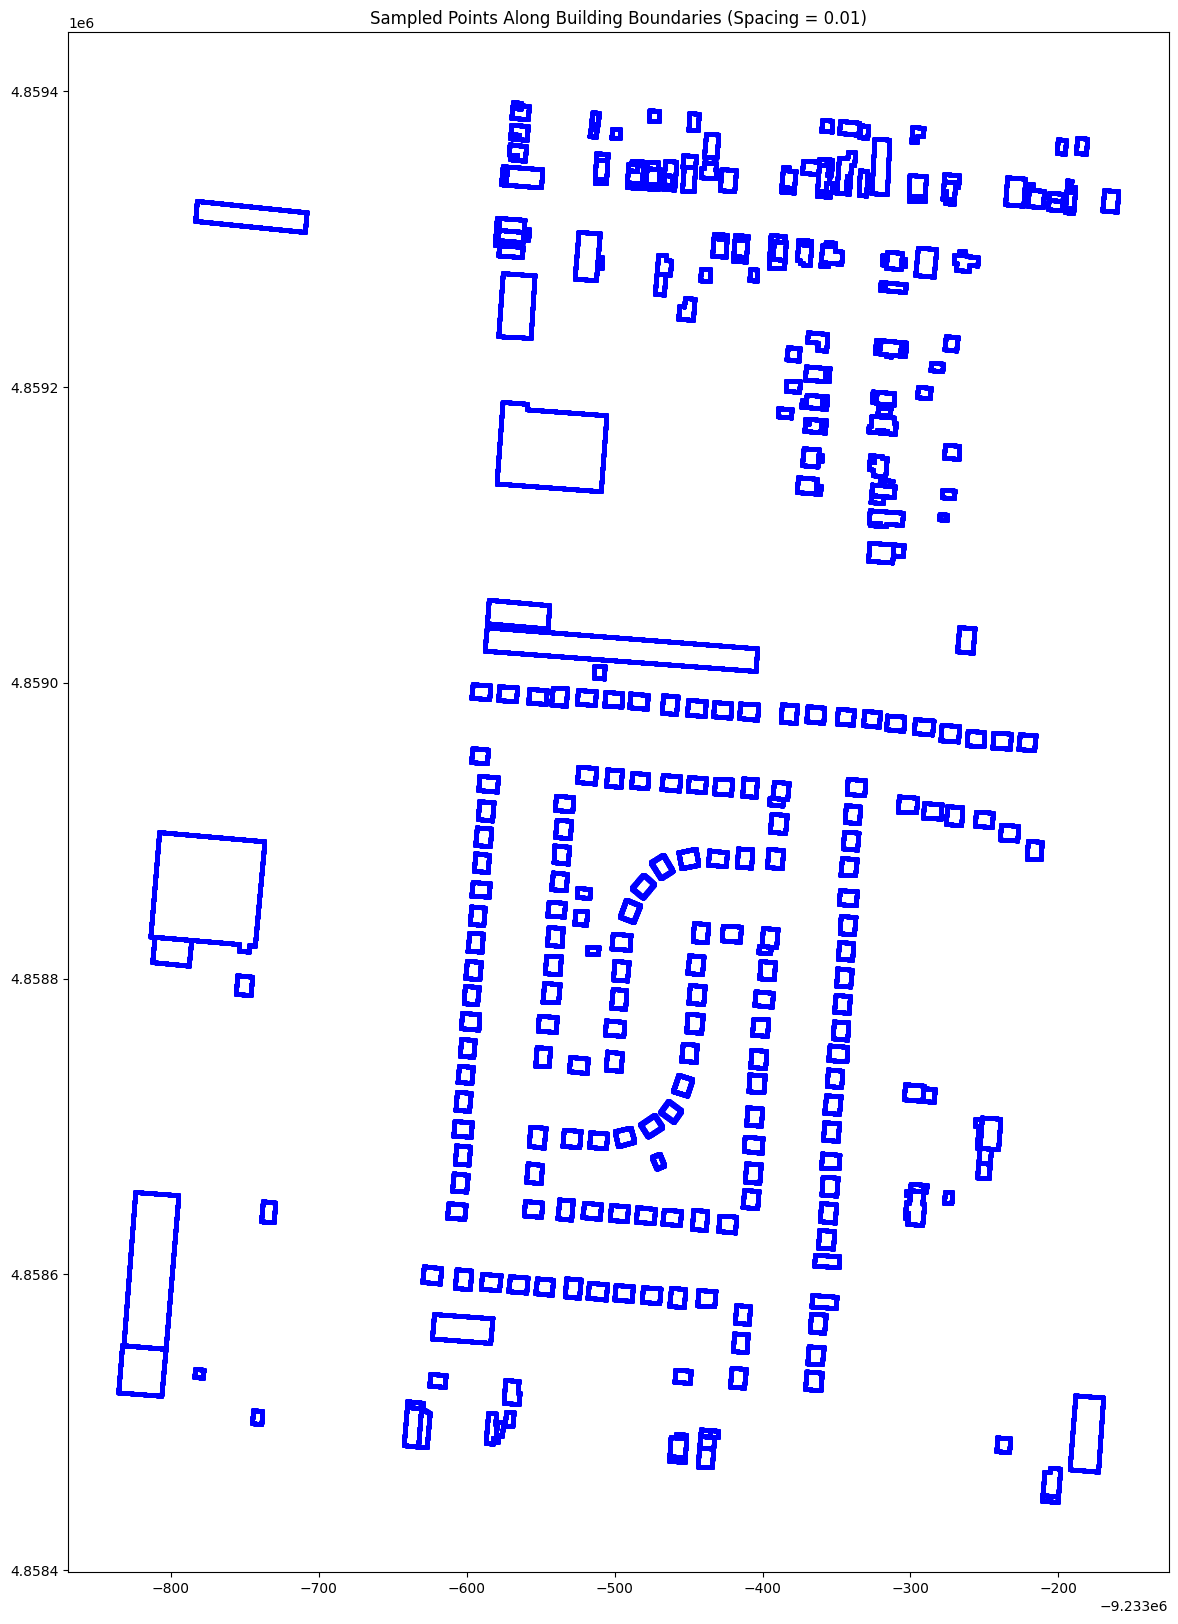

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(20, 20))
buildings_gdf.plot(ax=ax, edgecolor='black', facecolor='none')
points_gdf.plot(ax=ax, color='blue', markersize=5)
plt.title("Sampled Points Along Building Boundaries (Spacing = 0.01)")
plt.show()

**1.2 Computing the Voronoi diagram and Creating the Medial Axis Graph**

For the points obtained from 1.1, the Voronoi diagram is computed and the medial axis is taken from the bisectors of the Voronoi diagram.

In [8]:
from scipy.spatial import Voronoi
from shapely.geometry import Polygon, MultiPolygon, LineString

In [9]:
# Compute medial axis from Voronoi bisectors
def compute_medial_axis(points_gdf, buildings_gdf):
    coords = np.array([[p.x, p.y] for p in points_gdf.geometry])
    vor = Voronoi(coords)
    medial_edges = []
    medial_points_set = set()

    buildings_union = buildings_gdf.union_all()

    for vpair in vor.ridge_vertices:
        if -1 in vpair:  # skip infinite ridges
            continue
        p1 = vor.vertices[vpair[0]]
        p2 = vor.vertices[vpair[1]]
        line = LineString([p1, p2])

        if buildings_union.contains(line):
            medial_edges.append(line)
            # Store both vertices as tuples (hashable)
            medial_points_set.add(tuple(p1))
            medial_points_set.add(tuple(p2))

    # Convert medial points set to GeoDataFrame
    from shapely.geometry import Point
    medial_points = [Point(xy) for xy in medial_points_set]
    medial_points_gdf = gpd.GeoDataFrame(geometry=medial_points, crs=buildings_gdf.crs)

    return medial_edges, medial_points_gdf

In [10]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [11]:
# Plot the results
# def plot_medial_axis_with_points(buildings_gdf, points_gdf, medial_edges, medial_points_gdf):
#     import matplotlib.pyplot as plt

#     medial_gdf = gpd.GeoDataFrame(geometry=medial_edges, crs=buildings_gdf.crs)

#     fig, ax = plt.subplots(figsize=(20, 20))
#     buildings_gdf.plot(ax=ax, edgecolor='black', facecolor='none', label='Buildings')
#     points_gdf.plot(ax=ax, color='blue', markersize=2, label='Sampled Points')
#     medial_gdf.plot(ax=ax, color='red', linewidth=1, label='Medial Axis (Voronoi)')
#     medial_points_gdf.plot(ax=ax, color='green', markersize=2, label='Medial Points')

#     plt.legend()
#     plt.title('Building Footprints, Sampled Points, Medial Axis and Medial Points')
#     plt.show()

In [12]:
# Plot the results
def plot_medial_axis_with_points(buildings_gdf, points_gdf, medial_edges, medial_points_gdf):
    import matplotlib.pyplot as plt
    import geopandas as gpd

    medial_gdf = gpd.GeoDataFrame(geometry=medial_edges, crs=buildings_gdf.crs)

    fig, ax = plt.subplots(figsize=(24, 24))
    buildings_gdf.plot(ax=ax, edgecolor='black', facecolor='none')
    points_gdf.plot(ax=ax, color='blue', markersize=0.05)
    medial_gdf.plot(ax=ax, color='red', linewidth=0.5)
    medial_points_gdf.plot(ax=ax, color='green', markersize=0.05)

    # Create legend
    building_patch = mpatches.Patch(facecolor='none', edgecolor='black', label='Buildings')
    points_handle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=2, label='Sampled Points')
    medial_edges_handle = mlines.Line2D([], [], color='red', linewidth=1, label='Medial Axis (Voronoi)')
    medial_points_handle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=2, label='Medial Points')

    ax.legend(handles=[building_patch, points_handle, medial_edges_handle, medial_points_handle])

    plt.title('Building Footprints, Sampled Points, Medial Axis and Medial Points')
    #plt.show()
    return fig

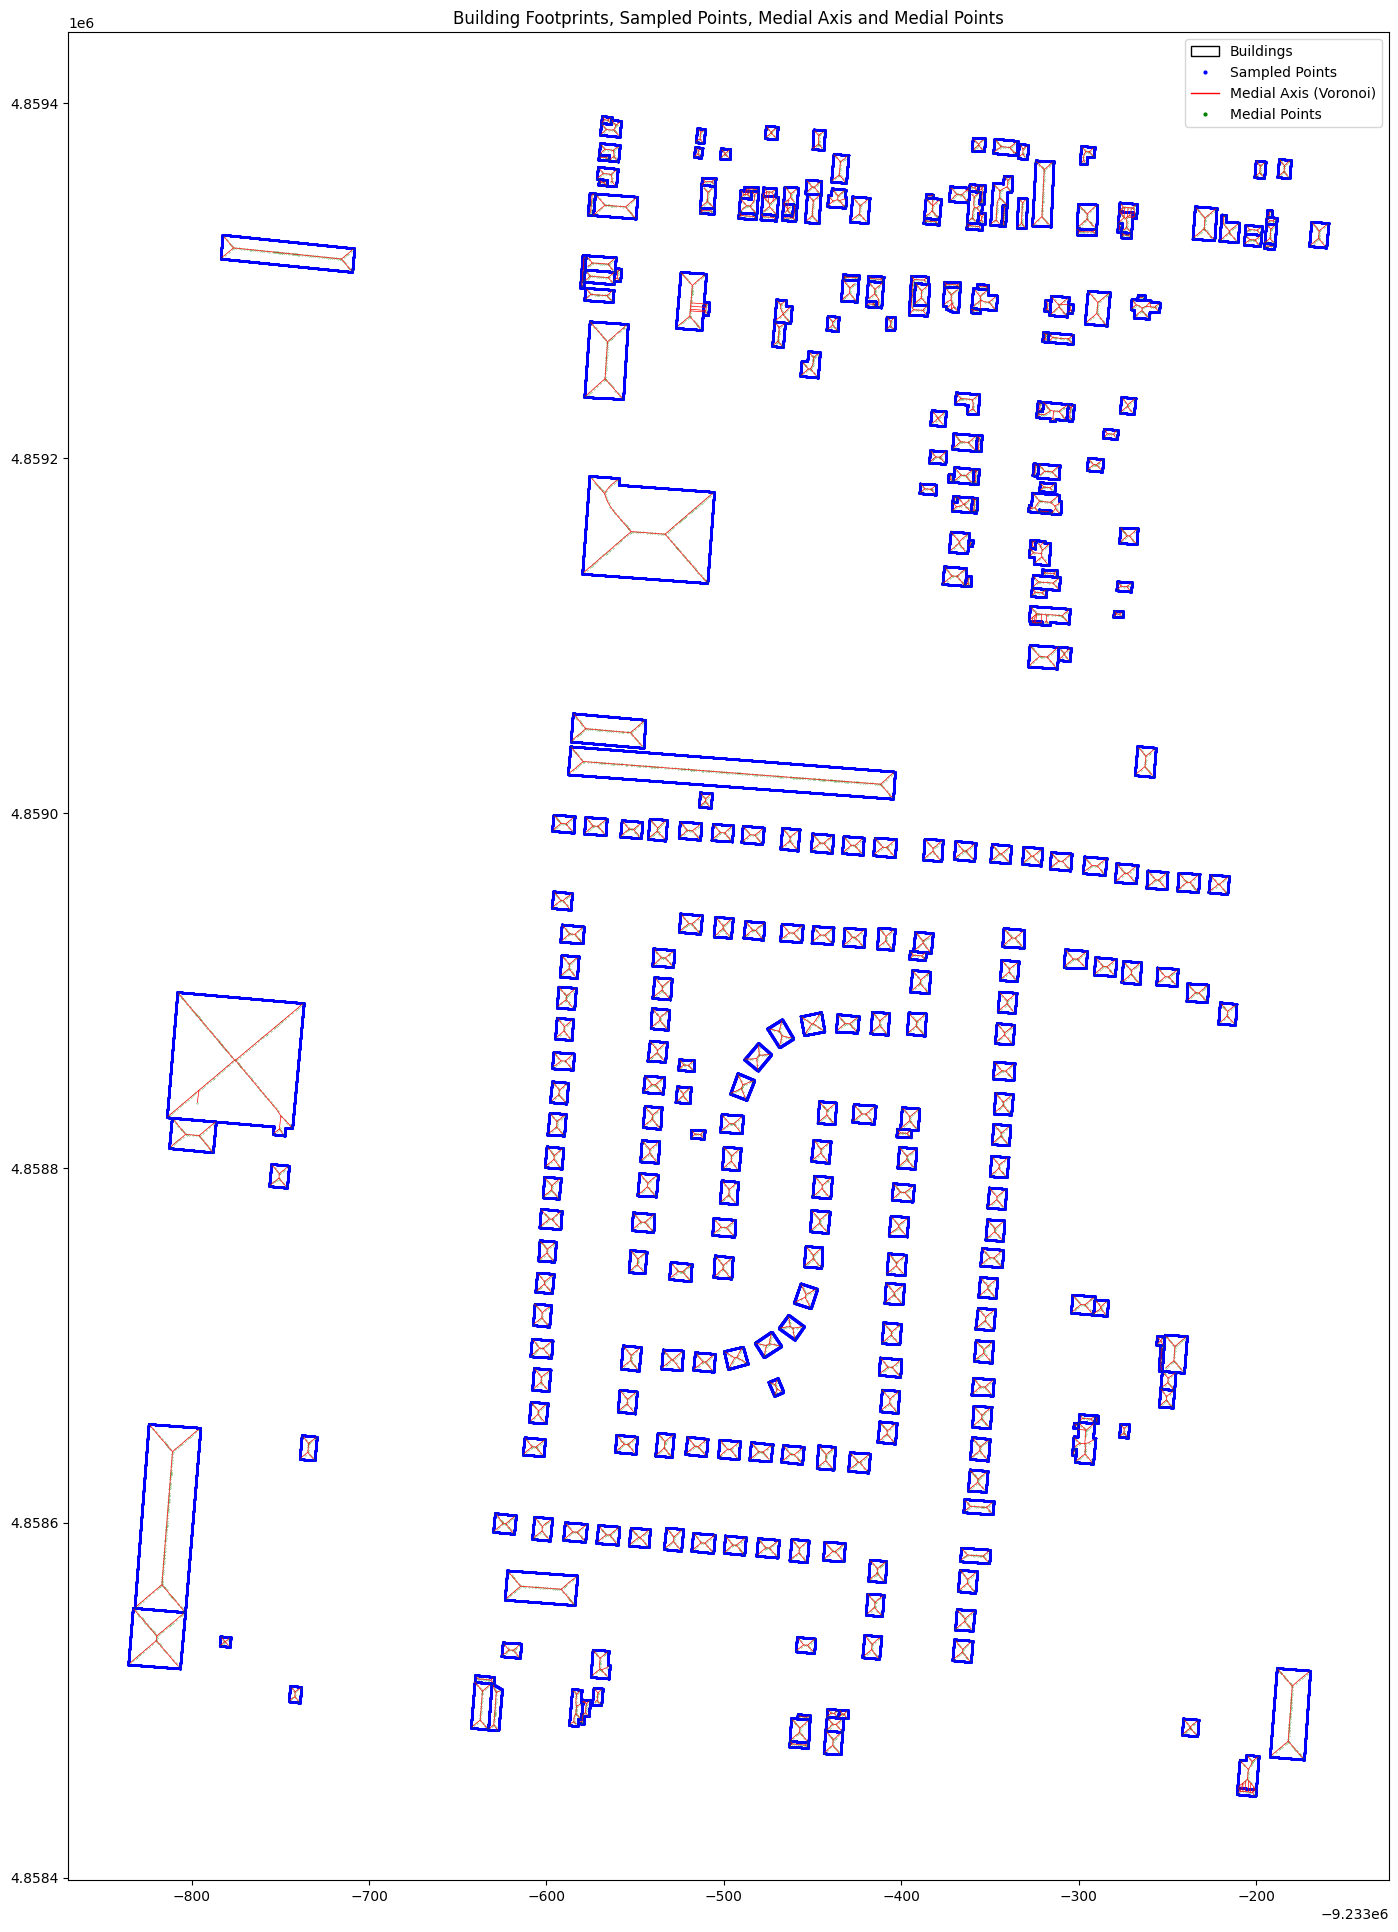

In [13]:
# use case
medial_edges, medial_points_gdf = compute_medial_axis(points_gdf, buildings_gdf)
#plot_medial_axis_with_points(buildings_gdf, points_gdf, medial_edges, medial_points_gdf)

fig_medial_axis = plot_medial_axis_with_points(buildings_gdf, points_gdf, medial_edges, medial_points_gdf)

In [14]:
fig_medial_axis.savefig("./data/output/medial_axis_after_0.01.png", dpi=1200, bbox_inches='tight')

### **Step 1: Medial Axis Approximation (Approach 2 Points Reduction)**

**1.1 Approximating points on the boundary of building footprints**

First, sample only the vertices where an edge changes direction — i.e., the actual corner points of the building footprints.

In [15]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon, Point, LineString
from shapely.ops import unary_union
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt

In [16]:
# placing points on the vertices where an edge changes direction
def sample_points_at_vertices(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    all_vertex_points = []

    for idx, row in gdf.iterrows():
        geom = row.geometry

        if geom is None or not isinstance(geom, (Polygon, MultiPolygon)):
            continue

        if isinstance(geom, MultiPolygon):
            geom = unary_union(geom)

        exterior_coords = list(geom.exterior.coords)
        vertex_points = [Point(xy) for xy in exterior_coords[:-1]]  # exclude duplicate last point
        all_vertex_points.extend(vertex_points)

    return gdf, gpd.GeoDataFrame(geometry=all_vertex_points, crs=gdf.crs)

In [17]:
# use case
buildings_gdf, vertex_points_gdf = sample_points_at_vertices("./data/input/529E/529E.shp")

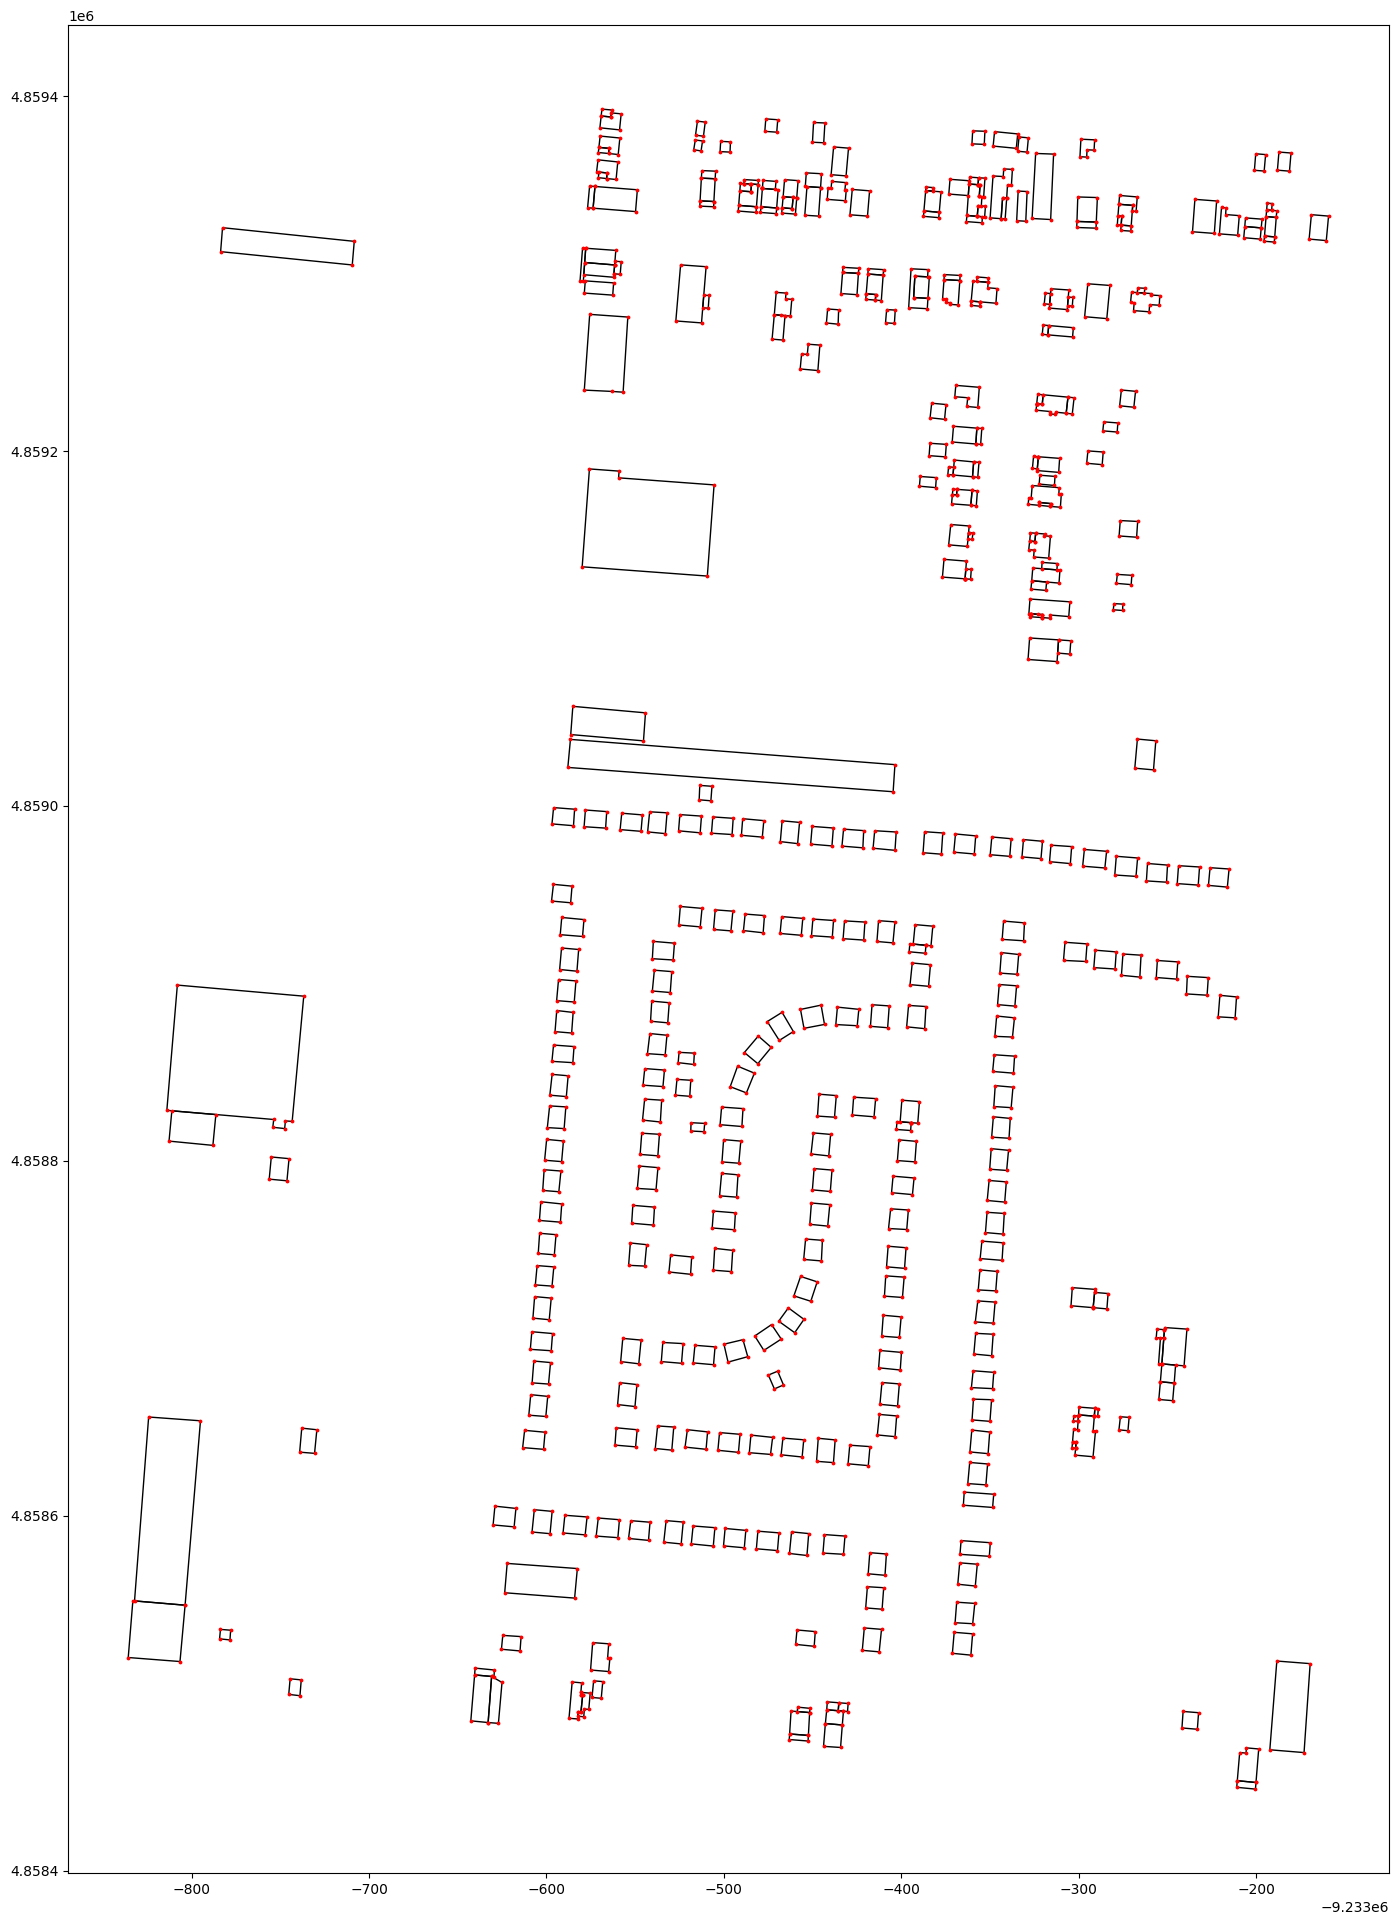

In [18]:
# plot
fig, ax = plt.subplots(figsize=(24, 24))
buildings_gdf.plot(ax=ax, edgecolor='black', facecolor='none')
vertex_points_gdf.plot(ax=ax, color='red', markersize=3)
plt.savefig("./data/output/vetices_reduced_points.png", dpi=1200, bbox_inches='tight')
plt.show()

**1.2 Computing the Voronoi diagram and Creating the Medial Axis Graph**

For the points obtained from 1.1, the Voronoi diagram is computed and the medial axis is taken from the bisectors of the Voronoi diagram.

In [19]:
def compute_medial_axis(vertex_points_gdf, buildings_gdf):
    coords = np.array([[p.x, p.y] for p in vertex_points_gdf.geometry])
    vor = Voronoi(coords)
    medial_edges = []
    medial_points_set = set()

    buildings_union = buildings_gdf.union_all()

    for vpair in vor.ridge_vertices:
        if -1 in vpair:  # skip infinite ridges
            continue
        p1 = vor.vertices[vpair[0]]
        p2 = vor.vertices[vpair[1]]
        line = LineString([p1, p2])

        if buildings_union.contains(line):
            medial_edges.append(line)
            # Store both vertices as tuples (hashable)
            medial_points_set.add(tuple(p1))
            medial_points_set.add(tuple(p2))

    # Convert medial points set to GeoDataFrame
    from shapely.geometry import Point
    medial_points = [Point(xy) for xy in medial_points_set]
    medial_points_gdf = gpd.GeoDataFrame(geometry=medial_points, crs=buildings_gdf.crs)

    return medial_edges, medial_points_gdf

In [20]:
# use case
medial_edges, medial_points_gdf = compute_medial_axis(vertex_points_gdf, buildings_gdf)
medial_edges_gdf = gpd.GeoDataFrame(geometry=medial_edges, crs=buildings_gdf.crs)

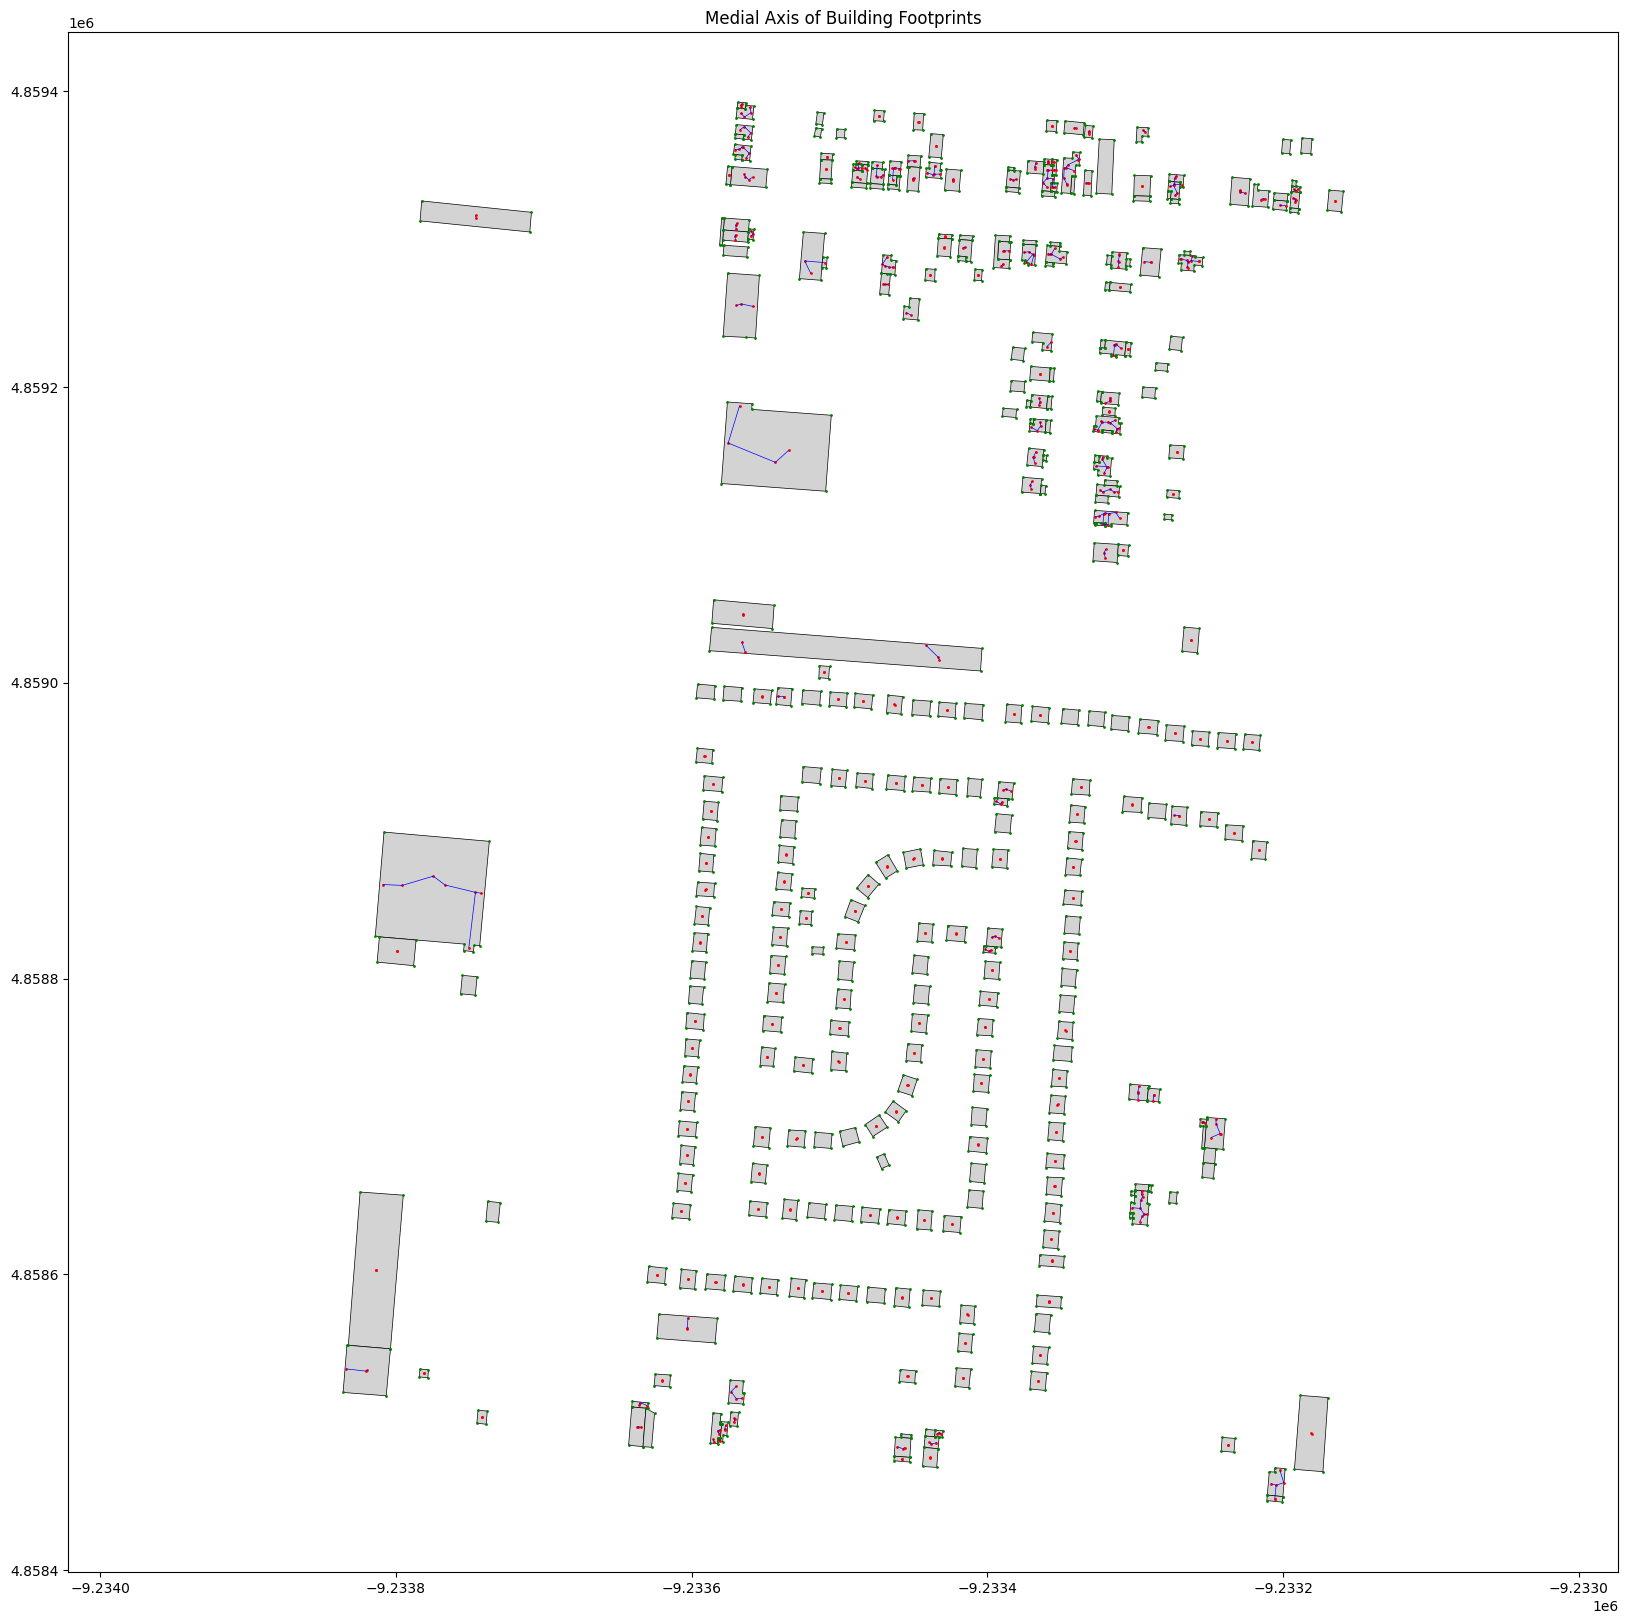

In [21]:
# plot
fig, ax = plt.subplots(figsize=(20, 20))
buildings_gdf.plot(ax=ax, color="lightgrey", edgecolor="black", linewidth=0.5) # base layer, building footprint
vertex_points_gdf.plot(ax=ax, color="green", markersize=1) # sampled vertex points
medial_edges_gdf.plot(ax=ax, color="blue", linewidth=0.5) # medial edges (skeleton) 
medial_points_gdf.plot(ax=ax, color="red", markersize=1) # medial axis points

ax.set_title("Medial Axis of Building Footprints")
ax.axis("equal")
plt.savefig("./data/output/medial_axis_reduced_points.png", dpi=1200, bbox_inches='tight')
plt.show()

### **Step 1: Medial Axis Approximation (Approach 3 with Scikit-Skeletonize)**

[Scikit-skeletonize](https://scikit-image.org/docs/0.25.x/auto_examples/edges/plot_skeleton.html)

In [22]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from shapely.geometry import LineString, Point
from rasterio import features
from skimage.measure import label, regionprops
from shapely.affinity import translate
import shapely
import rasterio
import os

In [23]:
def polygon_to_skeleton(polygon, pixel_size=1):
    # Get bounds
    minx, miny, maxx, maxy = polygon.bounds
    width = int((maxx - minx) / pixel_size) + 1
    height = int((maxy - miny) / pixel_size) + 1

    # Create transform
    transform = rasterio.transform.from_origin(minx, maxy, pixel_size, pixel_size)

    # Rasterize
    mask = features.rasterize(
        [(polygon, 1)],
        out_shape=(height, width),
        transform=transform,
        fill=0,
        all_touched=True,
        dtype=np.uint8
    )

    # Skeletonize
    skeleton = skeletonize(mask)

    # Convert skeleton pixels to LineStrings
    lines = []
    for y in range(skeleton.shape[0]):
        for x in range(skeleton.shape[1]):
            if skeleton[y, x]:
                px = transform * (x + 0.5, y + 0.5)
                lines.append(Point(px))

    return lines

In [24]:
buildings_gdf = gpd.read_file("./data/input/529E/529E.shp")

In [25]:
# Store all skeleton points
all_skeleton_points = []

for poly in buildings_gdf.geometry:
    if poly is None or not poly.is_valid or poly.is_empty:
        continue
    if poly.geom_type == "MultiPolygon":
        for part in poly.geoms:
            if part is not None and part.is_valid and not part.is_empty:
                all_skeleton_points.extend(polygon_to_skeleton(part))
    else:
        all_skeleton_points.extend(polygon_to_skeleton(poly))

# Create a GeoDataFrame for skeleton points
skeleton_gdf = gpd.GeoDataFrame(geometry=all_skeleton_points, crs=buildings_gdf.crs)

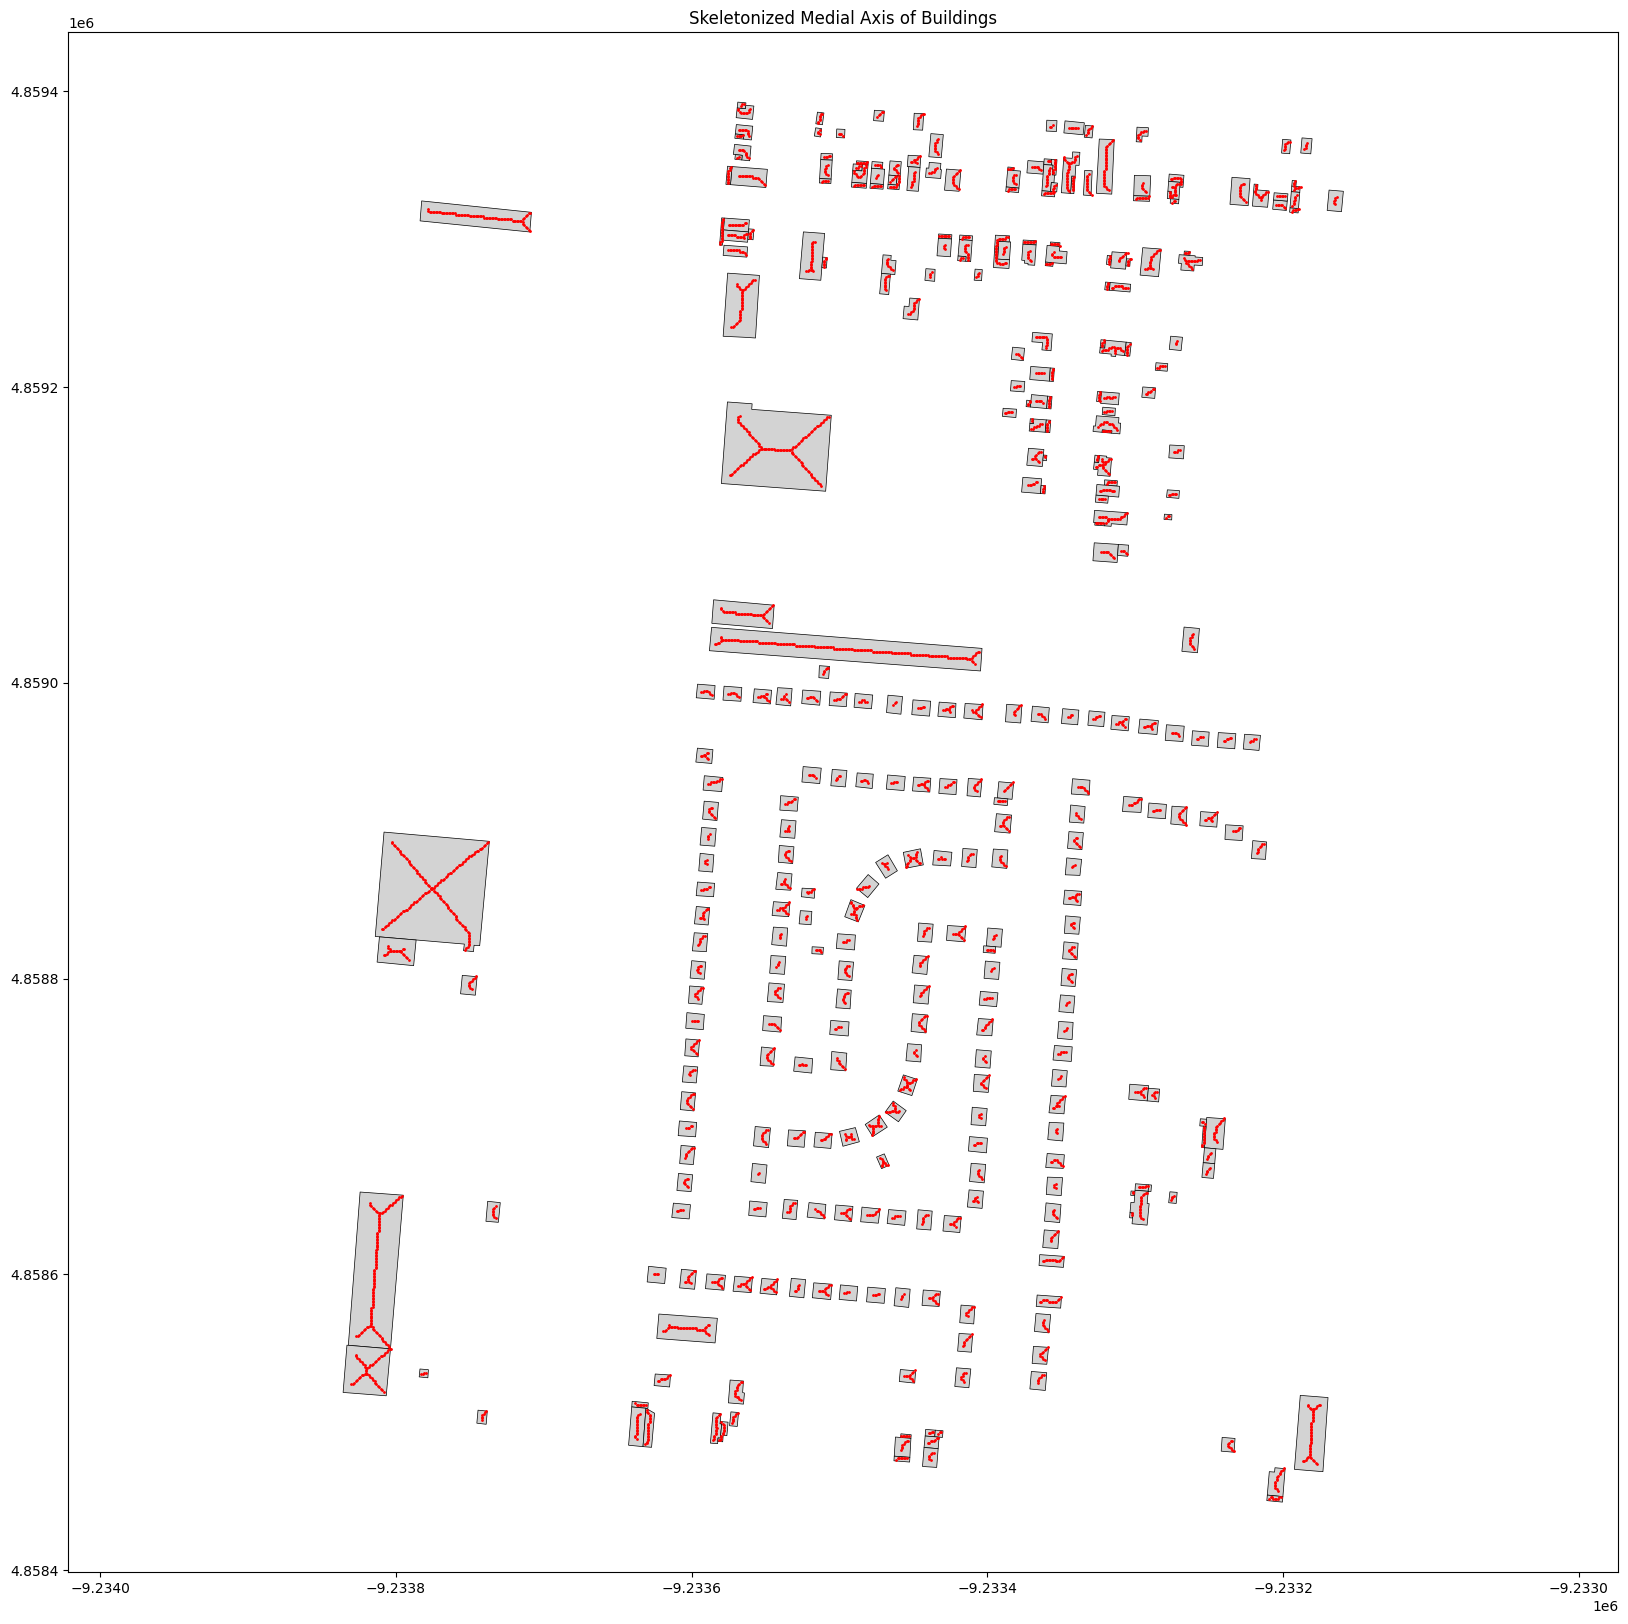

In [26]:
# Plot
fig, ax = plt.subplots(figsize=(20, 20))
buildings_gdf.plot(ax=ax, facecolor="lightgray", edgecolor="black", linewidth=0.5)
skeleton_gdf.plot(ax=ax, color="red", markersize=1)
ax.set_title("Skeletonized Medial Axis of Buildings")
plt.axis("equal")
plt.savefig("./data/output/medial_axis_skeletonized.png", dpi=1200, bbox_inches='tight')
plt.show()

### **Step 1: Medial Axis Approximation (Approach 4 Point reduction and edge construction in step 1, scikit geometry in step 2)**

[Scikit-geometry documentation](https://scikit-geometry.github.io/scikit-geometry/skeleton.html)</br>
[Scikit-geometry GitHub](https://github.com/scikit-geometry/scikit-geometry)
</br>


**Library installation process**

There were issues with installing `skgeom` using `pip install skgeom`. The solution I used was:
1. Clone the repository of `scikit-geometry` using `git clone https://github.com/scikit-geometry/scikit-geometry.git`.
2. Install dependencies:
   - `sudo apt libcdal-dev`
3. In the cloned repository, change the file named `setup.py`, refer to the changes [here](https://github.com/scikit-geometry/scikit-geometry/pull/116/files).
4. Initially, there were issues running the function `sg.skeleton.create_interior_straight_skeleton()`, which is the function to create skeleton from polygon. To fix this, revert the commit [868ef29](https://github.com/scikit-geometry/scikit-geometry/issues/103).
5. Build and install `scikit-geometry`:
   - In the local repository folder, use the command: `pip install -e . -v`.
  
For more complete documentation on Skeleton, refer to [CGAL](https://doc.cgal.org/latest/Straight_skeleton_2/group__PkgStraightSkeleton2SkeletonFunctions.html#gae1eec4fe2422502d32906f11306a4979).

**1.1 Approximating points on vertices of building footprints and constructing edges between vertices**

In [27]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon, Point, LineString
from shapely.ops import unary_union
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import wasserstein_distance
import ot

In [28]:
# placing points on the vertices where an edge changes direction, constructing edges between vertices
def sample_points_at_vertices(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    all_vertex_points = []
    all_edges = []

    for idx, row in gdf.iterrows():
        geom = row.geometry # extracts the geometry (i.e., building footprint) from the row in the gdf

        # skip any rows without geometry or with a geometry that is not a polygon or multipolygon, null geometries
        if geom is None or not isinstance(geom, (Polygon, MultiPolygon)):
            print(idx)
            print(geom)
            continue

        # if the geometry is a multipolygon, merge them into a single polygon
        if isinstance(geom, MultiPolygon):
            geom = unary_union(geom)

        exterior_coords = list(geom.exterior.coords) # get the coordinates of the outer boundary of the polygon, in a sequence of (x,y) tuples
        coords = exterior_coords[:-1]
        vertex_points = [Point(xy) for xy in exterior_coords[:-1]]  # convert each (x,y) coordinate into a Point object, exclude the last coordinate since it duplicates the first (to close the polygon)
        all_vertex_points.extend(vertex_points) # add all the Point objects of a polygon to the list all_vertex_points

        # Create edges between consecutive vertices
        edges = [LineString([coords[i], coords[i + 1]]) for i in range(len(coords) - 1)]
        # Add edge between the last and first to close the polygon
        edges.append(LineString([coords[-1], coords[0]]))

        all_edges.extend(edges)

    # Return GeoDataFrames for points and edges
    points_gdf = gpd.GeoDataFrame(geometry=all_vertex_points, crs=gdf.crs)
    edges_gdf = gpd.GeoDataFrame(geometry=all_edges, crs=gdf.crs)

    return gdf, points_gdf, edges_gdf

In [29]:
# use case
buildings_gdf, points_gdf, edges_gdf = sample_points_at_vertices("./data/input/529E/529E.shp")

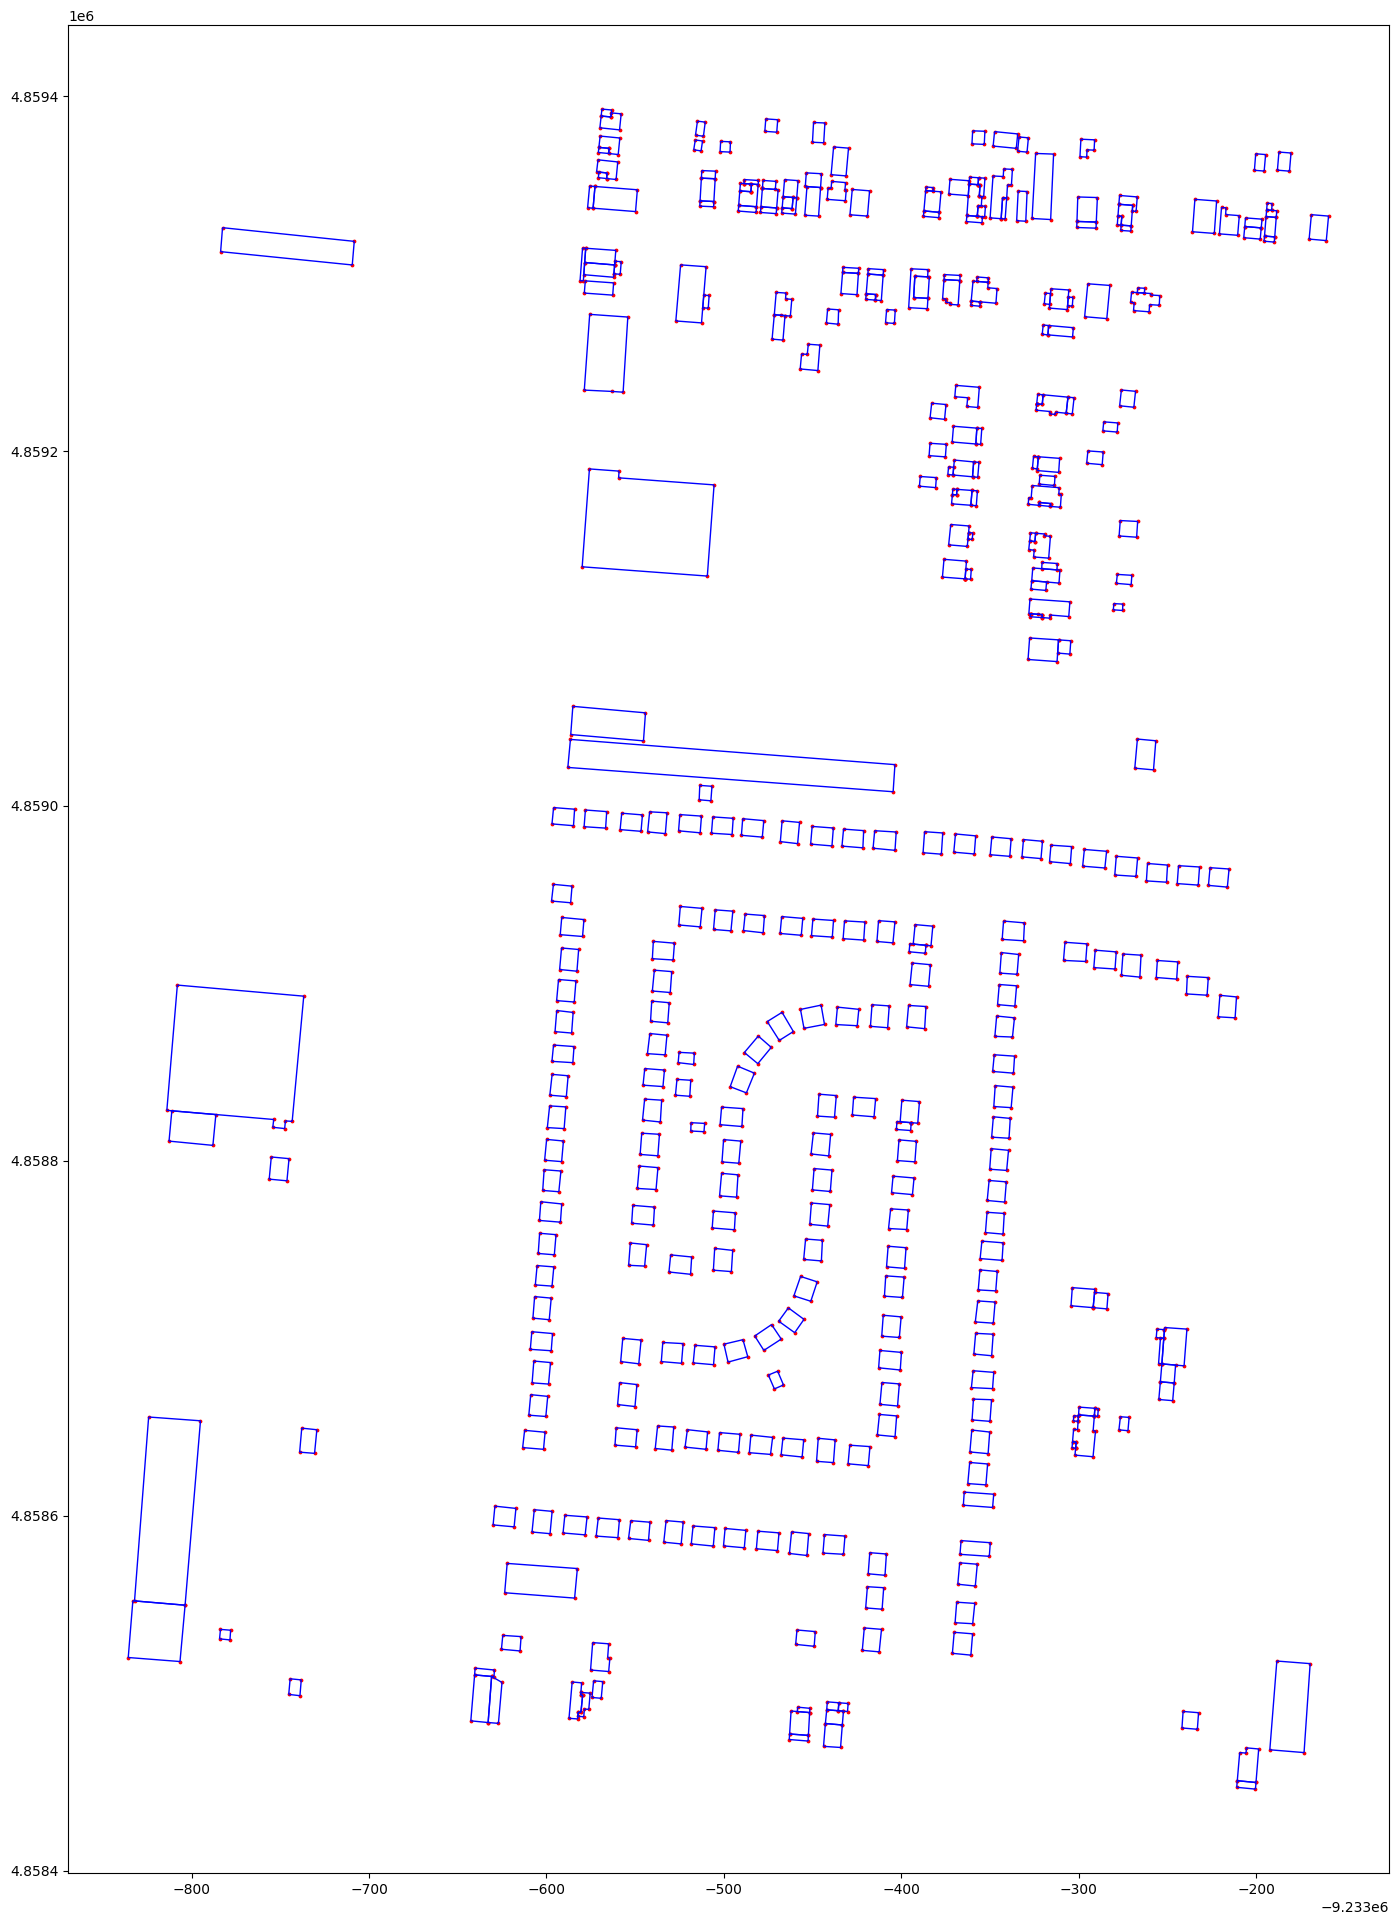

In [30]:
# plot
fig, ax = plt.subplots(figsize=(24, 24))
edges_gdf.plot(ax=ax, edgecolor='blue', linewidth=1, facecolor='none')
points_gdf.plot(ax=ax, color='red', markersize=3)
plt.savefig("./data/output/vetices_edges_reduced_points.png", dpi=1200, bbox_inches='tight')
plt.show()

**1.2 Medial axis construction using scikit-geometry**

In [31]:
import skgeom as sg
from skgeom.draw import draw

In [32]:
buildings_gdf 
# buildings_gdf.geometry

,stories,materials,blockID,height(m),geometry
0,2,frame or wood,630b,NaN,"POLYGON ((-9233563.682 4859388.217, -9233563.4..."
1,2,concrete and cinder block,1974a,NaN,"POLYGON ((-9233450.127 4859373.974, -9233449.5..."
2,1,frame or wood,2010a,NaN,"POLYGON ((-9233348.309 4859371.8, -9233347.519..."
3,2,frame or wood,636a,NaN,"POLYGON ((-9233558.67 4859376.354, -9233559.59..."
4,1,frame or wood,1956,NaN,"POLYGON ((-9233502.187 4859368.688, -9233501.8..."
...,...,...,...,...,...
332,None,brick or tile,R.808b,3.6576,"POLYGON ((-9233811.121 4858828.158, -9233786.3..."
333,None,None,1826a,10.0584,"POLYGON ((-9233824.192 4858655.628, -9233794.9..."
334,None,None,1826b,15.2400,"POLYGON ((-9233833.089 4858552.073, -9233803.6..."
335,1,brick or tile,1826c,NaN,"POLYGON ((-9233783.715 4858535.96, -9233777.99..."


In [33]:
# print(buildings_gdf.geometry[0].boundary)

In [34]:
# x_coord = buildings_gdf.geometry[0].boundary.coords[0][0]
# y_coord = buildings_gdf.geometry[0].boundary.coords[0][1]

In [35]:
# # extract points from one polygon
# points = []

# for x,y in buildings_gdf.geometry[4].boundary.coords[:-1]:
#     #print(x, y)
#     # points.append([x_coords,y_coords])
#     points.append(sg.Point2(x,y))
# print(points[::-1]) # make sure it is counter-clockwise

# # construct a polygon using points
# poly = sg.Polygon(points[::-1])
# draw(poly)

# # construct skeleton from polygon
# skel = sg.skeleton.create_interior_straight_skeleton(poly)

In [36]:
# print(type(skel))

In [37]:
def draw_skeleton(polygon, skeleton, show_time=False):
    draw(polygon)

    for h in skeleton.halfedges:
        if h.is_bisector:
            p1 = h.vertex.point
            p2 = h.opposite.vertex.point
            plt.plot([p1.x(), p2.x()], [p1.y(), p2.y()], 'r-', lw=2)

    if show_time:
        for v in skeleton.vertices:
            plt.gcf().gca().add_artist(plt.Circle(
                (v.point.x(), v.point.y()),
                v.time, color='blue', fill=False))

In [38]:
# draw_skeleton(poly, skel)

In [39]:
print(type(buildings_gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [40]:
all_poly = []
all_skeleton = []

for idx, row in buildings_gdf.iterrows():
    geom = row.geometry
    #print(geom)

    # skip any rows without geometry or with a geometry that is not a polygon or multipolygon, null geometries
    if geom is None or not isinstance(geom, (Polygon, MultiPolygon)): 
        print(idx)
        print(geom)
        continue

    # continue to work with geom that is not null
    # for each geom, extract the points and convert them to sg.Point2; use the points to create and draw poly; create the skeleton for each geom
    points = []
    for x,y in geom.boundary.coords[:-1]: # [:-1] to exclude the last point that is used to close the polygon
        points.append(sg.Point2(x,y))
         
    poly = sg.Polygon(points[::-1]) # reverse order of the points    
    all_poly.append(poly)
    skel = sg.skeleton.create_interior_straight_skeleton(poly)        
    all_skeleton.append(skel)

#print(idx)
#print(all_poly)
#len(all_poly)

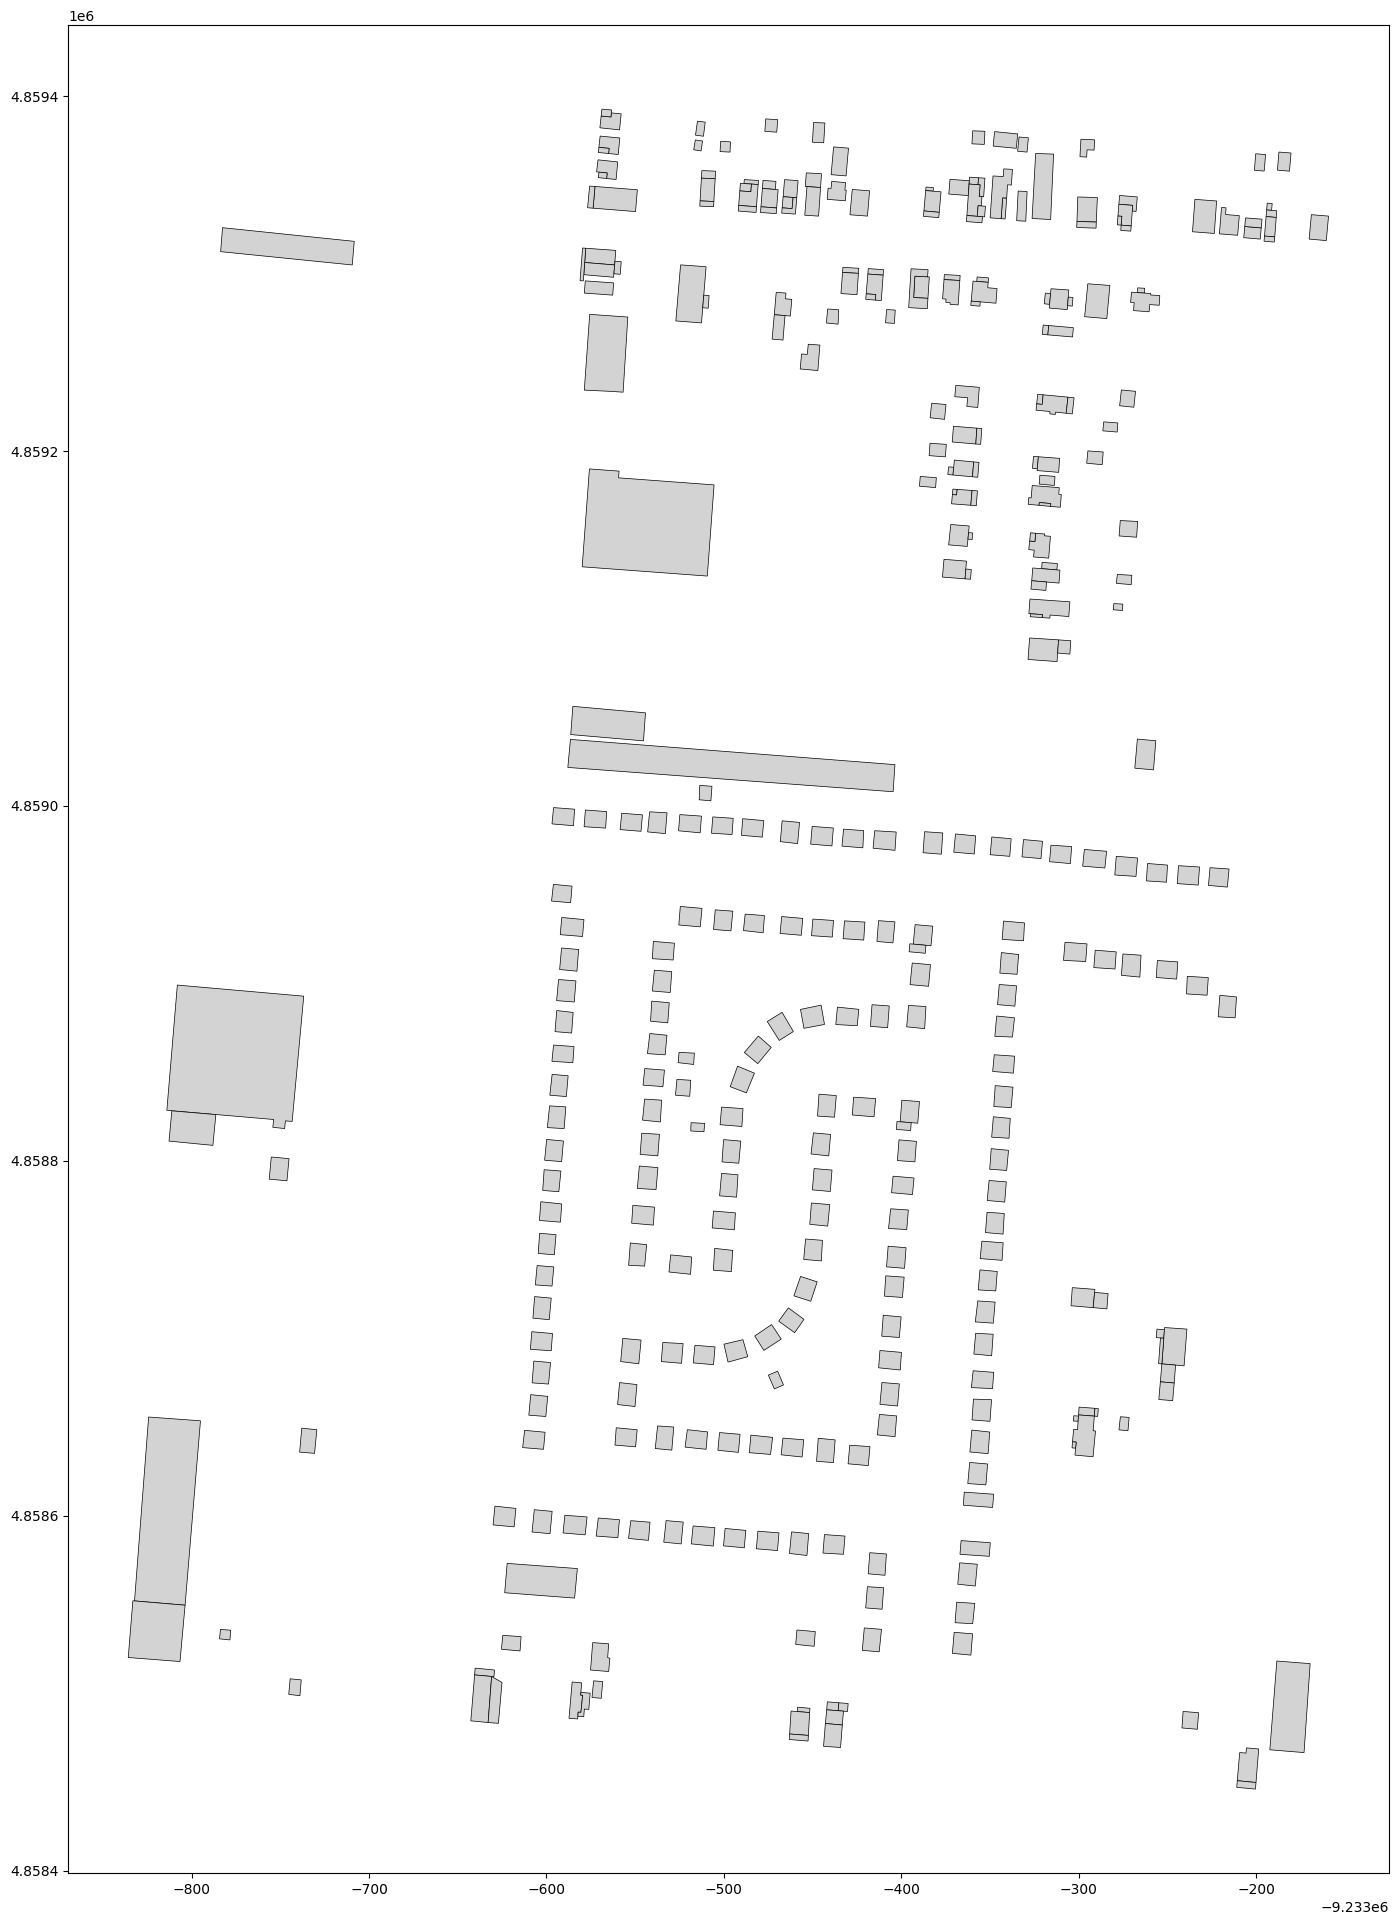

In [41]:
plt.figure(figsize=(24,24))
draw(all_poly, plt=plt, line_width=0.5)

In [42]:
def draw_all_skeletons(polygon, all_skeletons, show_time=False, figsize=(24,24)):
    plt.figure(figsize=figsize)
    draw(polygon, line_width=0.5)
    
    for item in all_skeletons:

        if item is None:
            continue
        
        for h in item.halfedges:
            if h.is_bisector:
                p1 = h.vertex.point
                p2 = h.opposite.vertex.point
                plt.plot([p1.x(), p2.x()], [p1.y(), p2.y()], 'r-', lw=0.5)

        if show_time:
            for v in skeleton.vertices:
                plt.gcf().gca().add_artist(plt.Circle(
                    (v.point.x(), v.point.y()),
                    v.time, color='blue', fill=False))
    return plt

In [43]:
for idx, x in enumerate(all_skeleton):
    if x == None:
        print(idx, x)

285 None


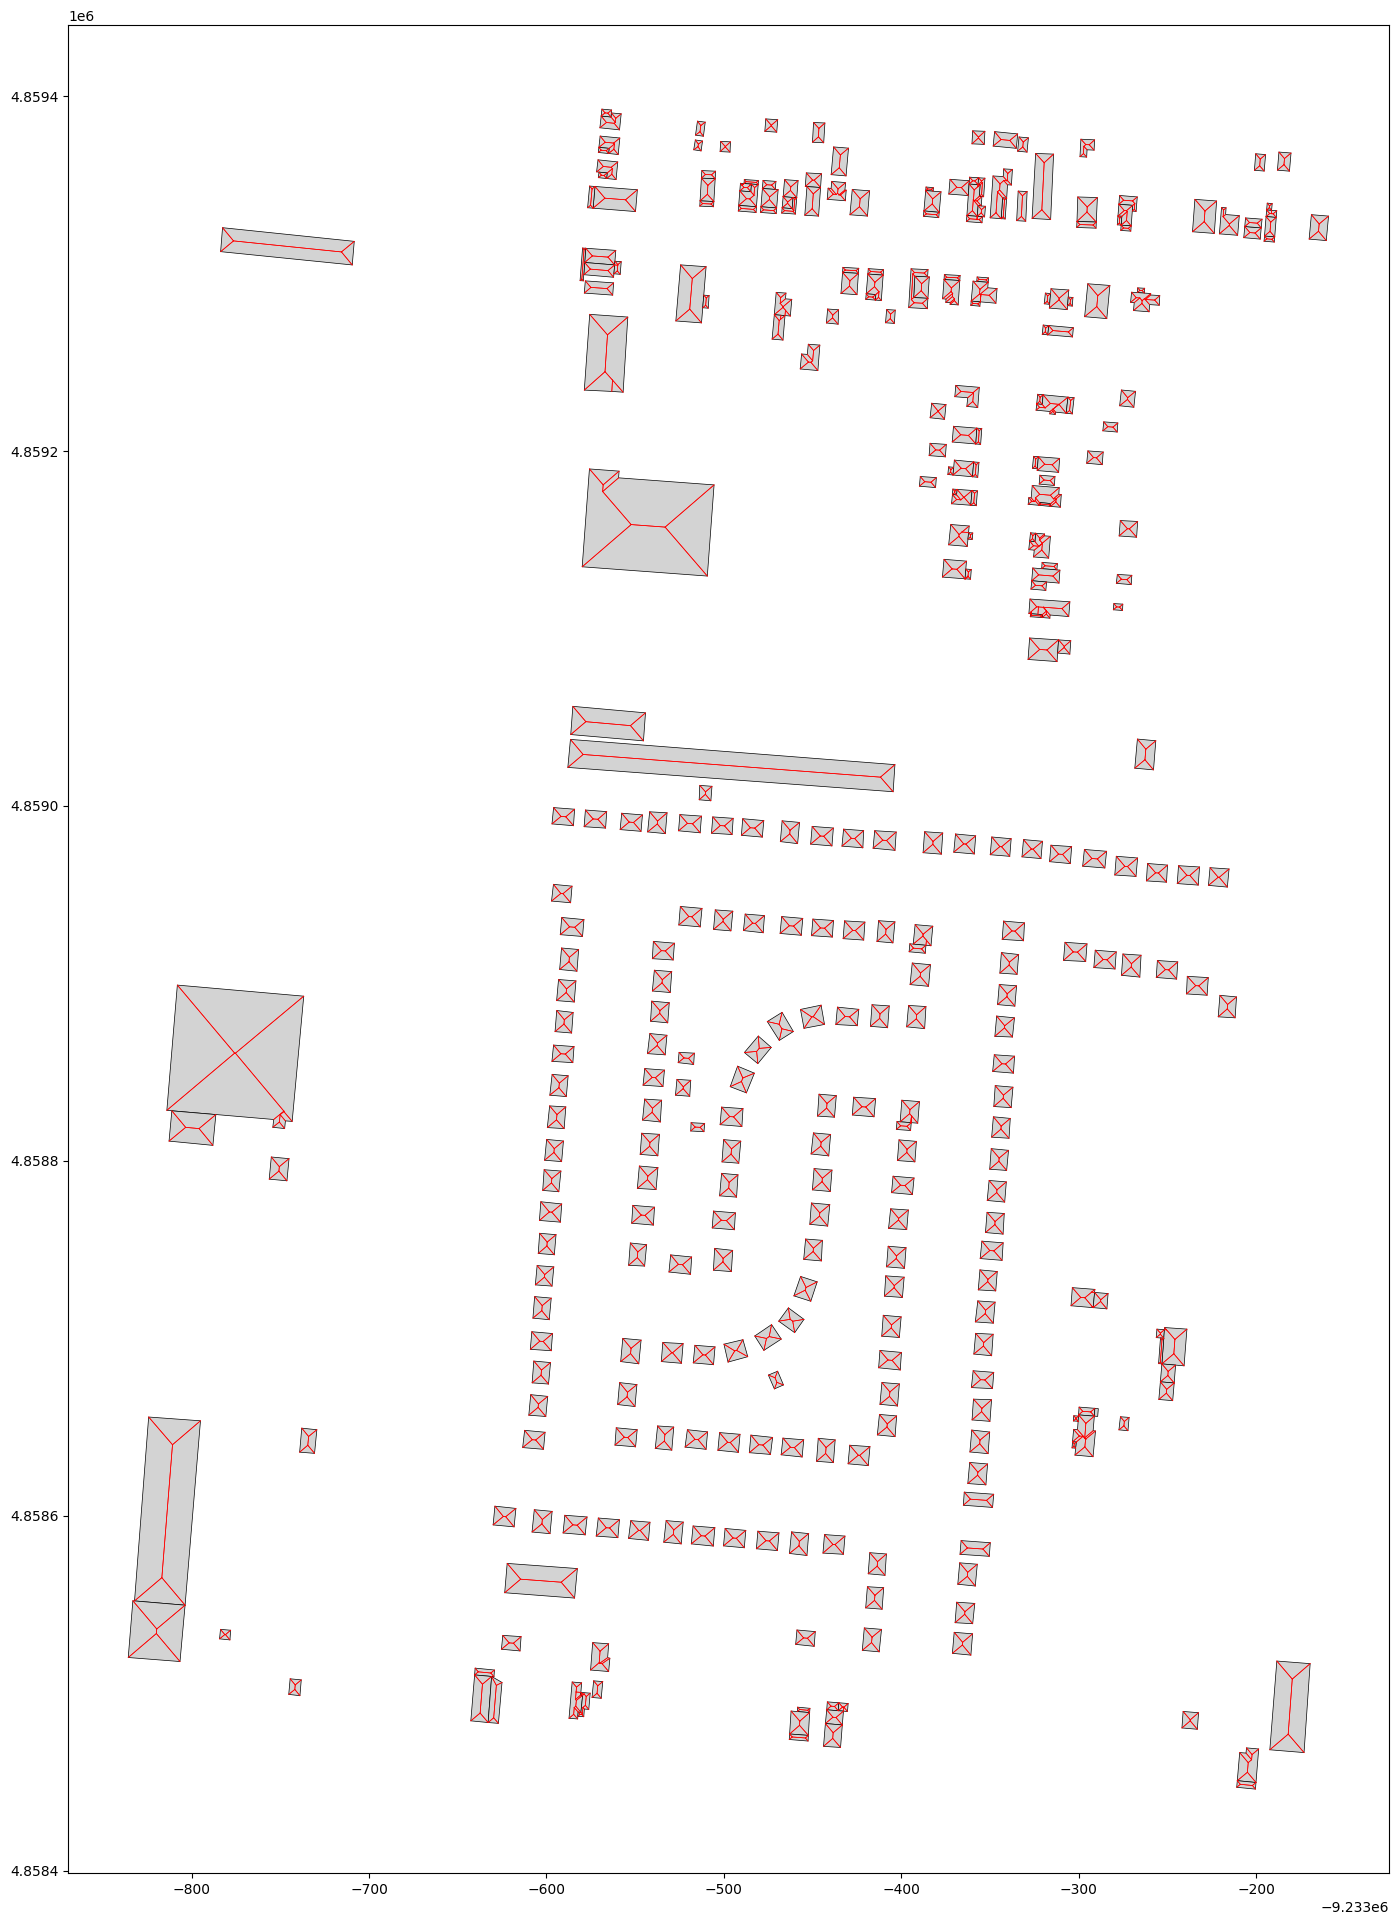

In [44]:
draw_all_skeletons(all_poly,all_skeleton)
plt.savefig("./data/output/scikit_geom.png", dpi=1200, bbox_inches='tight')

### Part of Part I in the paper (maybe not needed in our approach 4)

**1.3 Path Decomposition**

The medial axis of a polygon (i.e., building footprint) is a planar graph whose vertices can be endpoints (degree 1), junctions (degree ≥3), or simple chain points (degree 2). This step performs path decomposition of the medial axis graph into sub-paths where internal vertices have degree 2. Each sub-path corresponds to a curve that can be simplified, allowing for point reduction in the next step.

Let $W = (v_0, ..., v_m)$ be a sequence of vertices of path $W$ in $G$ such that:
- deg($v_0$) $\neq$ 2,
- deg($v_m$) $\neq$ 2, and
- deg($v_1$) = ... = deg($v_{m-1}$) = 2

Given that the path decomposition of $G$, each of these paths corresponds to a curve that can be simplified.

**1.4 Point Reduction using [Douglas-Peucker Algorithm](https://rdp.readthedocs.io/en/stable/)**

Apply the [Douglas-Peucker Algorithm](https://rdp.readthedocs.io/en/stable/) to each path to simplify the curves by reducing points but preserving the overall shape. The path decomposition ensures that the graph topology is not changed with respect to the characteristic points of the medial axis representation.

**1.5 Branch Reduction**

This step removes some "unnecessary" details or extensions of building footprints, so that buildings with similar shapes but small variations will still be able to generate identical medial graph. An algoritm developed by the authors helps to identify small brances and decides whether to remove them or not.

**Algorithm 1**: Branch Reduction Algorithm (Source: [Duong et al., 2023](https://doi.org/10.1145/3615900.3628790)). </br>
<img src="./images/branch_reduction_algo.png" alt="alt text" width="400" height="700"/> </br>


## PART II: Clustering

**2.1 Graph Embedding and Weisfeiler-Lehman Label Propagation** </br>
*Ningchuan: can use networkX python library*

This step aims to generate node labels based on the neighborhood around each node in a graph. Each node is given an initial label, and in each iteration, the current label is updated by combining its own label with the labels of its neighboring node. The idea behind is that vertices with the same initial label and with similar neighborhood structure will receive similar labels, enabling the comparison of shapes structurally using a graph method.

***From the paper:*** Constructed from the medial axis graph, the graph for a polygon (or a building footprint) is represented as $G = (V, E)$. The graphs are undirected and the vertex attribute $a(v)$ denotes the radius of the corresponding vertex of the medial axis transform for all $v \in V$. 

***STEP 1: Approach attempted for creating networkx graphs:*** 
This step aims to translate a skeleton graph into a networkx graph for each building footprint. Refer to [networkx documentation](https://networkx.org/documentation/networkx-1.7/tutorial/tutorial.html).

<span style="color:red">
Trying with individual building footprints
</span>

In [45]:
# testing idea for 1 polygon only
# extract points from one polygon
points1 = []

for x,y in buildings_gdf.geometry[1].boundary.coords[:-1]:
    #print(x, y)
    # points1.append([x_coords,y_coords])
    points1.append(sg.Point2(x,y))
print(points1[::-1]) # make sure it is counter-clockwise

# construct a polygon using points
poly1 = sg.Polygon(points1[::-1])
#draw(poly1)

# construct skeleton from polygon
skel1 = sg.skeleton.create_interior_straight_skeleton(poly1)
#skel1

[PointC2(-9.23344e+06, 4.85937e+06), PointC2(-9.23344e+06, 4.85938e+06), PointC2(-9.23345e+06, 4.85939e+06), PointC2(-9.23345e+06, 4.85937e+06)]


In [46]:
# extract points from second polygon
points2 = []

for x,y in buildings_gdf.geometry[2].boundary.coords[:-1]:
    #print(x, y)
    # points2.append([x_coords,y_coords])
    points2.append(sg.Point2(x,y))
print(points2[::-1]) # make sure it is counter-clockwise

# construct a polygon using points
poly2 = sg.Polygon(points2[::-1])
#draw(poly2)

# construct skeleton from polygon
skel2 = sg.skeleton.create_interior_straight_skeleton(poly2)
#skel2

[PointC2(-9.23334e+06, 4.85937e+06), PointC2(-9.23333e+06, 4.85938e+06), PointC2(-9.23335e+06, 4.85938e+06), PointC2(-9.23335e+06, 4.85937e+06)]


In [47]:
# extract points from third polygon
points3 = []

for x,y in buildings_gdf.geometry[3].boundary.coords[:-1]:
    #print(x, y)
    # points3.append([x_coords,y_coords])
    points3.append(sg.Point2(x,y))
print(points3[::-1]) # make sure it is counter-clockwise

# construct a polygon using points
poly3 = sg.Polygon(points3[::-1])
#draw(poly2)

# construct skeleton from polygon
skel3 = sg.skeleton.create_interior_straight_skeleton(poly3)
#skel3

[PointC2(-9.23357e+06, 4.85938e+06), PointC2(-9.23357e+06, 4.85937e+06), PointC2(-9.23356e+06, 4.85937e+06), PointC2(-9.23357e+06, 4.85937e+06), PointC2(-9.23356e+06, 4.85937e+06), PointC2(-9.23356e+06, 4.85938e+06)]


In [48]:
def draw_skeleton_only(polygon, skeleton, ax, show_time=False):
    #draw(polygon)

    for h in skeleton.halfedges:
        if h.is_bisector:
            p1 = h.vertex.point
            p2 = h.opposite.vertex.point
            ### this is for single graph
            #plt.plot([p1.x(), p2.x()], [p1.y(), p2.y()], 'r-', lw=2) 
            ### this is for single graph
            ax.plot([p1.x(), p2.x()], [p1.y(), p2.y()], 'r-', lw=1.5)
            
    if show_time:
        ### this is for single graph
        # for v in skeleton.vertices: 
        #     plt.gcf().gca().add_artist(plt.Circle(
        #         (v.point.x(), v.point.y()),
        #         v.time, color='blue', fill=False))
        ### this is for single graph
        for v in skeleton.vertices:
            ax.add_artist(plt.Circle(
                (v.point.x(), v.point.y()),
                v.time, color='blue', fill=False))

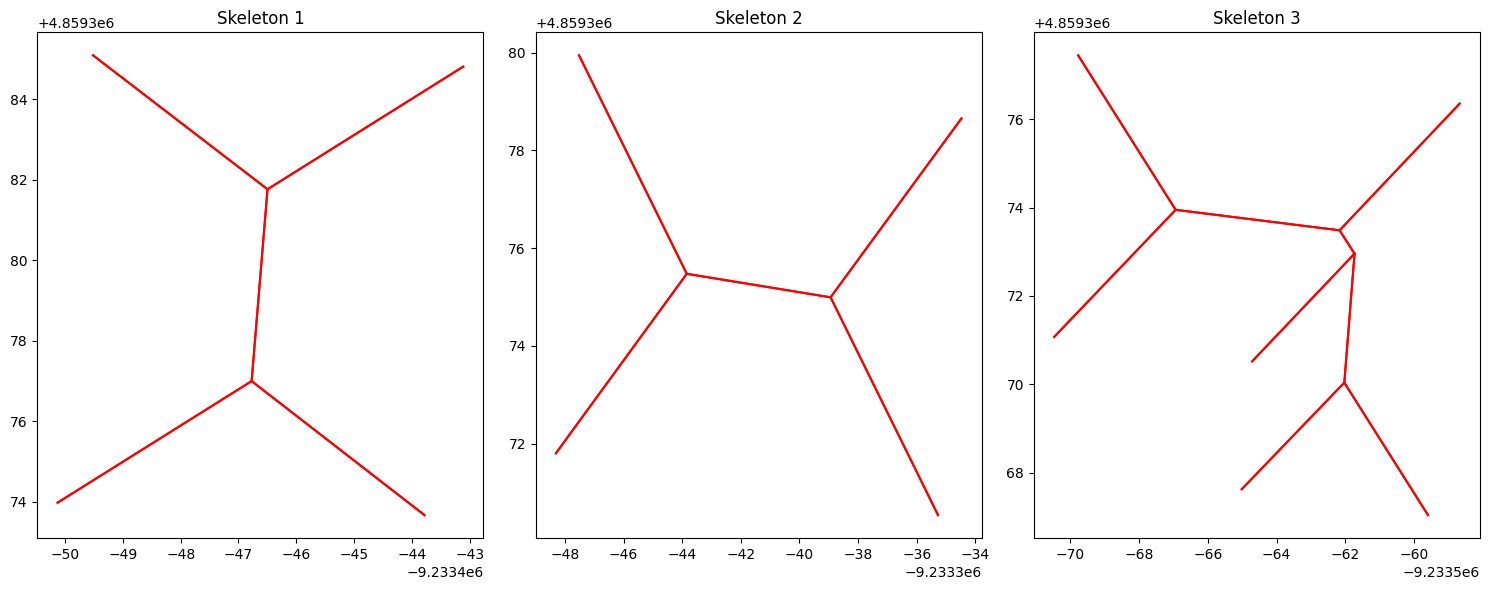

In [49]:
# draw 3 skeleton graphs

fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].set_title("Skeleton 1")
axs[0].set_frame_on(True)
draw_skeleton_only(poly1, skel1, ax=axs[0])
axs[0].axis('on')

axs[1].set_title("Skeleton 2")
axs[1].set_frame_on(True)
draw_skeleton_only(poly2, skel2, ax=axs[1])
axs[1].axis('on')

axs[2].set_title("Skeleton 3")
axs[2].set_frame_on(True)
draw_skeleton_only(poly3, skel3, ax=axs[2])
axs[2].axis('on')

plt.tight_layout()
plt.show()

In [50]:
# extract vertices and edges from the above skeleton
poly_vertices1 = list(skel1.vertices)
poly_edges1 = list(skel1.halfedges)

In [51]:
# extract vertices and edges from the second skeleton
poly_vertices2 = list(skel2.vertices)
poly_edges2 = list(skel2.halfedges)

In [52]:
# extract vertices and edges from the third skeleton
poly_vertices3 = list(skel3.vertices)
poly_edges3 = list(skel3.halfedges)

In [53]:
#poly_vertices1[2]
#poly_edges1[0].vertex
#poly_edges1[0].vertex in poly_vertices

In [54]:
print(len(poly_edges1), len(poly_edges2), len(poly_edges3))

18 18 30


In [55]:
# construct a networkx graph from a skeleton graph
#import networkx as nx

In [56]:
#G.add_edge(poly_edges[0].vertex,poly_edges[0].opposite.vertex)

# create an empty graph with no nodes and no edges
G1=nx.Graph()

# grow undirected (since it adds up from both direction) graph G by adding edge, done by specifying the vertex id at two ends to determine the edge
for item in poly_edges1:
    if item.is_bisector:
        p1 = item.vertex.id # vertex id
        p2 = item.opposite.vertex.id
        G1.add_edge(p1, p2)

In [57]:
# create an empty graph with no nodes and no edges
G2=nx.Graph()

# grow undirected (since it adds up from both direction) graph G by adding edge, done by specifying the vertex id at two ends to determine the edge
for item in poly_edges2:
    if item.is_bisector:
        p1 = item.vertex.id # vertex id
        p2 = item.opposite.vertex.id
        G2.add_edge(p1, p2)

In [58]:
# create an empty graph with no nodes and no edges
G3=nx.Graph()

# grow undirected (since it adds up from both direction) graph G by adding edge, done by specifying the vertex id at two ends to determine the edge
for item in poly_edges3:
    if item.is_bisector:
        p1 = item.vertex.id # vertex id
        p2 = item.opposite.vertex.id
        G3.add_edge(p1, p2)

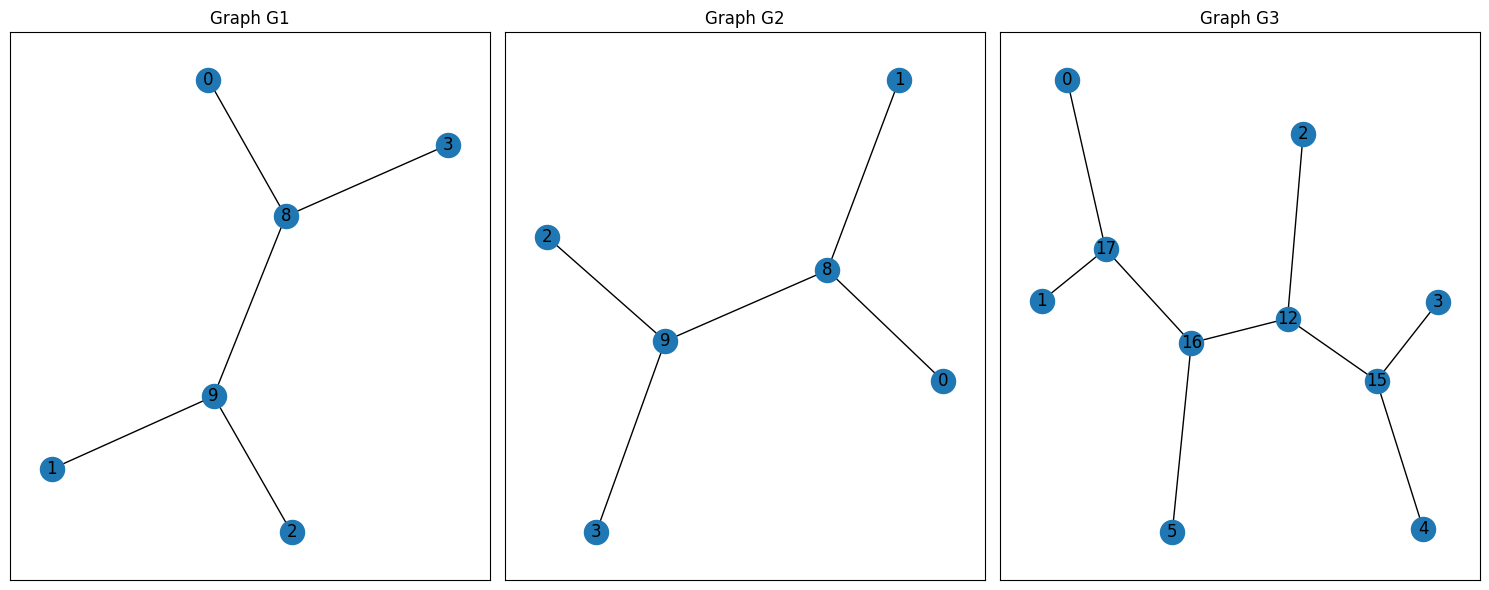

In [59]:
# draw graphs

fig, axs = plt.subplots(1, 3, figsize=(15, 6))  # 1 row, 3 columns

# Plot G1
axs[0].set_title("Graph G1")
axs[0].set_frame_on(True)  # ensure box is shown
nx.draw(G1, with_labels=True, ax=axs[0])
axs[0].axis('on')  # shows axis boundary (box)

# Plot G2
axs[1].set_title("Graph G2")
axs[1].set_frame_on(True)
nx.draw(G2, with_labels=True, ax=axs[1])
axs[1].axis('on')

# Plot G3
axs[2].set_title("Graph G3")
axs[2].set_frame_on(True)
nx.draw(G3, with_labels=True, ax=axs[2])
axs[2].axis('on')

plt.tight_layout()
plt.show()

***STEP 2: Weisfeiler-Lehman label propagation***

***Attempted approach here:*** Used the `weisfeiler_lehman_subgraph_hashes()` function from `networkx`. Refer to documentation [here](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.graph_hashing.weisfeiler_lehman_subgraph_hashes.html). 

<span style="color:red">
Trying with individual building footprints
</span>

In [60]:
# similar nodes in different graphs
g1_hashes = nx.weisfeiler_lehman_subgraph_hashes(
    G1, iterations=4, digest_size=8
)

g2_hashes = nx.weisfeiler_lehman_subgraph_hashes(
    G2, iterations=4, digest_size=8
)

g3_hashes = nx.weisfeiler_lehman_subgraph_hashes(
    G3, iterations=4, digest_size=8
)

In [61]:
g1_hashes[1] # the hash sequence of depth 3 for node 1 in G1 

['a93b64973cfc8897',
 '4712e8ce4ea0a115',
 '70644c05e5cce718',
 '9fa64bf3416b0198']

In [62]:
g2_hashes[1] # the hash sequence of depth 3 for node 1 in G2

['a93b64973cfc8897',
 '4712e8ce4ea0a115',
 '70644c05e5cce718',
 '9fa64bf3416b0198']

In [63]:
g3_hashes[1] # the hash sequence of depth 3 for node 1 in G3

['a93b64973cfc8897',
 '4712e8ce4ea0a115',
 '3fdcacc3dd02dbdc',
 '724c7cd7cdfeb191']

In [64]:
g1_hashes == g2_hashes

True

In [65]:
g1_hashes == g3_hashes

False

In [66]:
g2_hashes == g3_hashes

False

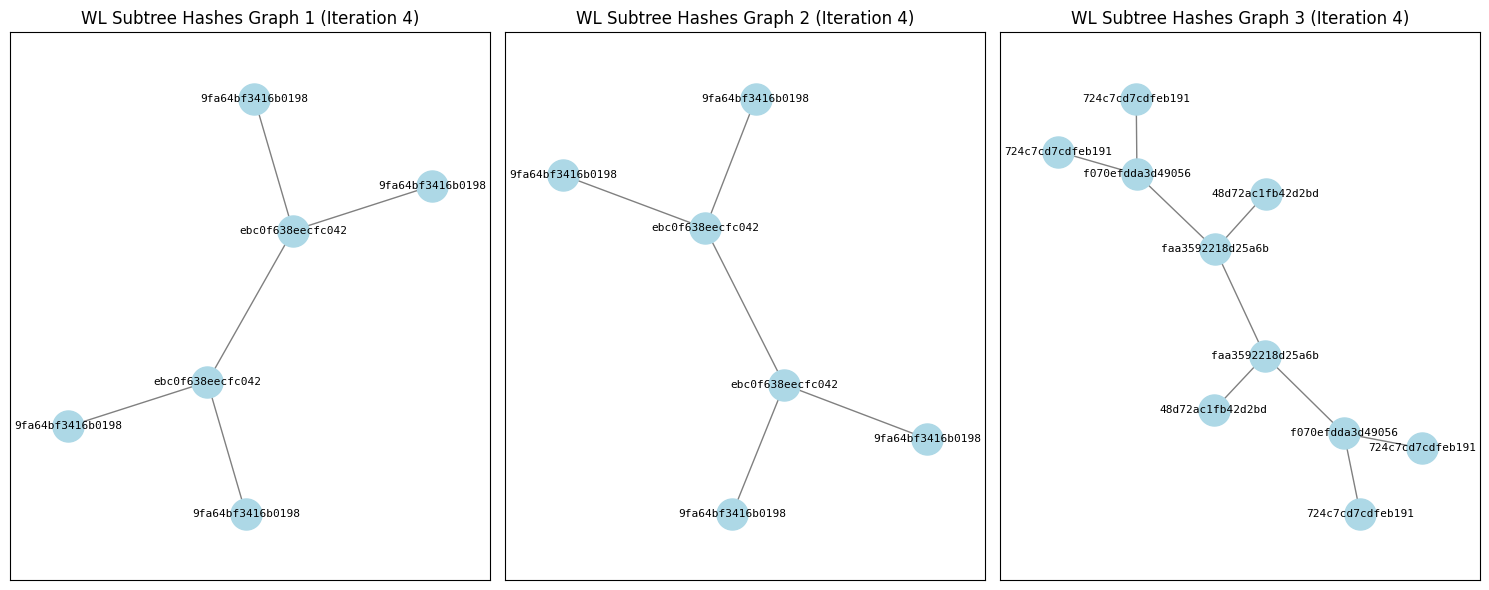

In [67]:
# get hash values for each node (latest iteration's hash)
node_labels1 = {node: hash_list[-1] for node, hash_list in g1_hashes.items()}
node_labels2 = {node: hash_list[-1] for node, hash_list in g2_hashes.items()}
node_labels3 = {node: hash_list[-1] for node, hash_list in g3_hashes.items()}


fig, axs = plt.subplots(1, 3, figsize=(15, 6))  # 1 row, 3 columns

# plot graphs with hash labels
# G1
pos1 = nx.spring_layout(G1, seed=42, scale=0.8)  # or any other layout
axs[0].set_title("WL Subtree Hashes Graph 1 (Iteration 4)")
axs[0].set_frame_on(True)  # ensure box is shown
nx.draw(G1, pos1, ax=axs[0], with_labels=False, node_color='lightblue', edge_color='gray', node_size=500)
nx.draw_networkx_labels(G1, pos1, ax=axs[0], labels=node_labels1, font_size=8, font_family="monospace")
axs[0].axis('on')  # shows axis boundary (box)

# G2
pos2 = nx.spring_layout(G2, seed=42, scale=0.8)  # or any other layout
axs[1].set_title("WL Subtree Hashes Graph 2 (Iteration 4)")
axs[1].set_frame_on(True)  # ensure box is shown
nx.draw(G2, pos2, ax=axs[1], with_labels=False, node_color='lightblue', edge_color='gray', node_size=500)
nx.draw_networkx_labels(G2, pos2, ax=axs[1], labels=node_labels2, font_size=8, font_family="monospace")
axs[1].axis('on')  # shows axis boundary (box)

# G3
pos3 = nx.spring_layout(G3, seed=42, scale=0.8)  # or any other layout
axs[2].set_title("WL Subtree Hashes Graph 3 (Iteration 4)")
axs[2].set_frame_on(True)  # ensure box is shown
nx.draw(G3, pos3, ax=axs[2], with_labels=False, node_color='lightblue', edge_color='gray', node_size=500)
nx.draw_networkx_labels(G3, pos3, ax=axs[2], labels=node_labels3, font_size=8, font_family="monospace")
axs[2].axis('on')  # shows axis boundary (box)

axs[0].margins(0.1)
axs[1].margins(0.1)
axs[2].margins(0.1)
plt.tight_layout()
plt.show()

***STEP 3: Graph Embedding***

***From the paper:*** Each edge $e = {u, v} \in E$ should be weighted by the Euclidean distance between the real-world coordinates of the endpoints $u$ and $v$. The authors changed the edge weights $w(e)$ from the Euclidean distance of the endpoints of the edge $e$, to the reciprocal weight $w'(e) = \frac{1}{w(e)}$ to control the feature scaling throughout the iterations. Additionally, the neighborhood should be weighted by the sum of the edge weights instead of the degree. 

The graph embedding is obtained by taking the weighted vectors of the Weisfeiler-Lehman features of each iteration $i$, which is given by $X(G_i) = [a_i(v_1),...,a_i(v_n)]$.

***Attempted approach here:*** We do not have the algorithm to weight the edge. Hence, we assume uniform weights for all edges. With the uniform weights, we proceed with creating node embeddings of graph $G$ at iteration $H$, [Togninalli et al. (2019)](https://arxiv.org/pdf/1906.01277)) defined it as:

$f^H: G \rightarrow \mathbb{R}^{n_G} \times (m(H+1))$ </br>
$G \mapsto \text {concatenate}(X^0_G,\dots,X^H_G)$

<span style="color:red">
Trying with individual building footprints
</span>

In [68]:
# create node embeddings of graph

# G1
G1_nf = [] # nf denotes node feature
for i in g1_hashes.values():
   G1_nf.append(i) 

# G2
G2_nf = []
for i in g2_hashes.values():
   G2_nf.append(i) 

# G3
G3_nf = []
for i in g3_hashes.values():
   G3_nf.append(i) 

print(f"G1: {G1_nf}; \nG2: {G2_nf}; \nG3: {G3_nf}")

G1: [['f4f0e54b75934327', 'ea0defedd70d89bc', 'c9c324f715d847c4', 'ebc0f638eecfc042'], ['a93b64973cfc8897', '4712e8ce4ea0a115', '70644c05e5cce718', '9fa64bf3416b0198'], ['f4f0e54b75934327', 'ea0defedd70d89bc', 'c9c324f715d847c4', 'ebc0f638eecfc042'], ['a93b64973cfc8897', '4712e8ce4ea0a115', '70644c05e5cce718', '9fa64bf3416b0198'], ['a93b64973cfc8897', '4712e8ce4ea0a115', '70644c05e5cce718', '9fa64bf3416b0198'], ['a93b64973cfc8897', '4712e8ce4ea0a115', '70644c05e5cce718', '9fa64bf3416b0198']]; 
G2: [['f4f0e54b75934327', 'ea0defedd70d89bc', 'c9c324f715d847c4', 'ebc0f638eecfc042'], ['a93b64973cfc8897', '4712e8ce4ea0a115', '70644c05e5cce718', '9fa64bf3416b0198'], ['a93b64973cfc8897', '4712e8ce4ea0a115', '70644c05e5cce718', '9fa64bf3416b0198'], ['f4f0e54b75934327', 'ea0defedd70d89bc', 'c9c324f715d847c4', 'ebc0f638eecfc042'], ['a93b64973cfc8897', '4712e8ce4ea0a115', '70644c05e5cce718', '9fa64bf3416b0198'], ['a93b64973cfc8897', '4712e8ce4ea0a115', '70644c05e5cce718', '9fa64bf3416b0198']]; 
G3

In [69]:
# convert list of list to matrix for the subsequent computation
# G1
G1_nf_m = np.array(G1_nf)
G1_nf_m.shape # 6x4

# G2
G2_nf_m = np.array(G2_nf)
G2_nf_m.shape # 6x4

# G3
G3_nf_m = np.array(G3_nf)
G3_nf_m.shape # 10x4

(10, 4)

In [70]:
print(f"G1 matrix:{G1_nf_m}; \nG2 matrix:{G2_nf_m}; \nG3 matrix:{G3_nf_m};")

G1 matrix:[['f4f0e54b75934327' 'ea0defedd70d89bc' 'c9c324f715d847c4'
  'ebc0f638eecfc042']
 ['a93b64973cfc8897' '4712e8ce4ea0a115' '70644c05e5cce718'
  '9fa64bf3416b0198']
 ['f4f0e54b75934327' 'ea0defedd70d89bc' 'c9c324f715d847c4'
  'ebc0f638eecfc042']
 ['a93b64973cfc8897' '4712e8ce4ea0a115' '70644c05e5cce718'
  '9fa64bf3416b0198']
 ['a93b64973cfc8897' '4712e8ce4ea0a115' '70644c05e5cce718'
  '9fa64bf3416b0198']
 ['a93b64973cfc8897' '4712e8ce4ea0a115' '70644c05e5cce718'
  '9fa64bf3416b0198']]; 
G2 matrix:[['f4f0e54b75934327' 'ea0defedd70d89bc' 'c9c324f715d847c4'
  'ebc0f638eecfc042']
 ['a93b64973cfc8897' '4712e8ce4ea0a115' '70644c05e5cce718'
  '9fa64bf3416b0198']
 ['a93b64973cfc8897' '4712e8ce4ea0a115' '70644c05e5cce718'
  '9fa64bf3416b0198']
 ['f4f0e54b75934327' 'ea0defedd70d89bc' 'c9c324f715d847c4'
  'ebc0f638eecfc042']
 ['a93b64973cfc8897' '4712e8ce4ea0a115' '70644c05e5cce718'
  '9fa64bf3416b0198']
 ['a93b64973cfc8897' '4712e8ce4ea0a115' '70644c05e5cce718'
  '9fa64bf3416b0198']]; 
G3

**2.2 Graph Wasserstein Distance using Optimal Transport Theory**

***From the paper:*** The final distance between two skeleton graphs of building footprints is determined by solving the optimal transport problem between the embedded vertex sets of the two graphs. The authors note that it is also necessary to assign weights to the vertices. Previous scholars used uniform weights; however, the authors observe that this significantly influences the distance measure such that similar buildings do not necessarily have a smaller distance. This occurred because for buildings with similar shape, the resulting skeleton graphs might be different; different building sizes (skeleton graphs) may yield differences in terms of the radius of the leaf vertices and inner vertices. Hence, the vertices should be weighted by degree. 

The authors define the mass of a vertex $u \in V$ by:

$w(u) = \frac{deg(u)}{deg_ {total}}$

with 

$deg_{total} = \Sigma_{u \in V} deg(v)$

With this, the inner vertices get a higher weight than the leaf vertices.

***Attempted approach here:*** </br>
*Graph Embedding Scheme*: Given a graph $G = (V,E)$, a graph embedding scheme is a function that outputs a fixed-size vectorial representation for each node in the graph.</br>
*Graph Wasserstein Distance*: Given two graphs $G = (V,E)$ and $G' = (V',E')$, a graph embedding scheme, and a ground distance, [Togninalli et al. (2019)](https://arxiv.org/pdf/1906.01277) defined the Graph Wasserstein Distance (GWD) as

$$D^f_W(G,G') := W_1(f(G),f(G'))$$

The Wasserstein distance is a distance function between probability distributions defined on a given metric space. It is linked to the optimal transport problem, where the aim is to find the most "inexpensive" way, in terms of the ground distance, to transport all the probability mass from distribution $\sigma$ to match distribution $\mu$. In the context of this work, we deal with finite sets of node embeddings and not with continuous probability distributions. Therefore, the Wasserstein distance can be reformulated as a sum rather than an integral, and uses the matrix notation commonly encountered in the optimal transport literature to represent the transportation plan. Given two sets of vectors $X \in \mathbb{R}^{n\times m}$ and $X' \in \mathbb{R}^{n'\times m}$, the authors equivalently define the Wasserstein distance between them as ([Togninalli et al., 2019](https://arxiv.org/pdf/1906.01277)):

$$W_1(X,X') := \underset{\{P \in \Gamma\}(X,X')}{\min} \langle P, M \rangle$$</br>

Here, $M$ is distance  matrix containing the distances $d(x,x')$ between each element $x$ of $X$ and $x'$ of $X'$, $P \in \Gamma$ is a transport matrix (or joing probability), and $\langle \dot , \dot \rangle$ is the Frobenius dot product. The transport matrix $P$ contains the fractions that indicate how to transport the values from $X$ to $X'$ with the minimal total transport effort. Because we asume that the total mass to be transported equals 1 and is evenly distributed across the elements of $X$ and $X'$, the row an dcolumn values of $P$ must sum up to $\frac{1}{n}$ and $\frac{1}{n'}$, respectively. 


To compute the pairwise Wasserstein Distance of graphs, it is first necessary to calculate the ground distances between each pair of nodes between graphs (e.g., `G1` and `G2`). For categorical node features like the context of this work, [Togninalli et al. (2019)](https://arxiv.org/pdf/1906.01277) suggest using the normalized Hamming distance:

$$d_{Ham}(v,v') = \frac {1}{H+1}\sum^{H+1}_{i=1} \rho(v_i,v'_i), \rho(x,y) = \begin{cases} 1, x \ne y \\ 0, x = y \end{cases}$$ 

The Hamming distance equals 1 when two vectors have no features in common and 0 when the vectors are identical. The Hamming distance is appropriate since the Weisfeiler-Lehman features are categorical, and values carry no meaning. When $d_{Ham}(v,v')$ is iterated through two sets of vectors $X \in \mathbb{R}^{n\times m}$ and $X' \in \mathbb{R}^{n'\times m}$, it gives $M$.


<span style="color:red">
Trying with individual building footprints
</span>

**Comparing G1 and G2**

In [71]:
# compare G1 and G2
M12 = np.zeros((len(G1_nf_m), len(G2_nf_m)))

# define a rho function for 1, x not equal y; and 0, x equals y
def rho(x,y):
    if x == y:
        return 0
    else:
        return 1

# this is to compute M
for index_i, v_i in enumerate(G1_nf_m): # row in graph 1
    #print(f"G1_nf_m:{v_i}")
    for index_i_p, v_i_p in enumerate(G2_nf_m): # row in graph 2
        #print(f"G2_nf_m:{v_i_p}")
        # this part computes dham
        ## this part computes the constant 1 / H + 1
        constant =  1.0 / (len(v_i)+1) 

        sum_of_rho = 0
        for i in range(len(v_i)): # since begin from 0, so just the original length, no need to +1 (as suggested in the equation)
            sum_of_rho += rho(v_i[i],v_i_p[i])
            #print(sum_of_rho)
   
        ## this part times the constant with the summation of the rhos
        dham = constant*sum_of_rho # this is dham(v,v'), to compute distance between each vertex (all iterations) of graphs, node1 in X vs node1 in X'

        M12[index_i,index_i_p] = dham
        
M12

array([[0. , 0.8, 0.8, 0. , 0.8, 0.8],
       [0.8, 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0.8, 0.8, 0. , 0.8, 0.8],
       [0.8, 0. , 0. , 0.8, 0. , 0. ],
       [0.8, 0. , 0. , 0.8, 0. , 0. ],
       [0.8, 0. , 0. , 0.8, 0. , 0. ]])

From the POT python library, the [`ot.emd2`](https://pythonot.github.io/quickstart.html) function returns the Wasserstein distance. For instance, it can be defined as:

`W = ot.emd2(a,b,M)`

where `a` and `b` are 1D histograms (sum to 1 and positive) and `M` is the ground cost matrix.

In [72]:
# compute a, the Origin, aka vertices in X (there is n # of vertices), each vertex in G1 should be represented as 1/n and summed up to 1
n_G1 = np.full(G1_nf_m.shape[0], 1/ G1_nf_m.shape[0]) # np.full(shape,fill_value) returns a new array of given shape and type, filled with fill_value.
n_G1

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [73]:
# compute b, the Destination, aka vertices in X' (there is n # of vertices)
n_G2 = np.full(G2_nf_m.shape[0], 1/ G2_nf_m.shape[0])
n_G2

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [74]:
#import ot
# from scipy.stats import wasserstein_distance
# import ot

In [75]:
wd_g12 = ot.emd2(n_G1, n_G2, M12)
wd_g12

0.0

**Comparing G1 and G3**

In [76]:
# compare G1 and G2
M13 = np.zeros((len(G1_nf_m), len(G3_nf_m)))

# define a rho function for 1, x not equal y; and 0, x equals y
def rho(x,y):
    if x == y:
        return 0
    else:
        return 1

# this is to compute M
for index_i, v_i in enumerate(G1_nf_m): # row in graph 1
    #print(f"G1_nf_m:{v_i}")
    for index_i_p, v_i_p in enumerate(G3_nf_m): # row in graph 2
        #print(f"G2_nf_m:{v_i_p}")
        # this part computes dham
        ## this part computes the constant 1 / H + 1
        constant =  1.0 / (len(v_i)+1) 

        sum_of_rho = 0
        for i in range(len(v_i)): # since begin from 0, so just the original length, no need to +1 (as suggested in the equation)
            sum_of_rho += rho(v_i[i],v_i_p[i])
            #print(sum_of_rho)
   
        ## this part times the constant with the summation of the rhos
        dham = constant*sum_of_rho # this is dham(v,v')

        M13[index_i,index_i_p] = dham
        
M13

array([[0.6, 0.8, 0.8, 0.8, 0.8, 0.6, 0.8, 0.8, 0.8, 0.8],
       [0.8, 0.4, 0.4, 0.8, 0.6, 0.8, 0.4, 0.4, 0.8, 0.6],
       [0.6, 0.8, 0.8, 0.8, 0.8, 0.6, 0.8, 0.8, 0.8, 0.8],
       [0.8, 0.4, 0.4, 0.8, 0.6, 0.8, 0.4, 0.4, 0.8, 0.6],
       [0.8, 0.4, 0.4, 0.8, 0.6, 0.8, 0.4, 0.4, 0.8, 0.6],
       [0.8, 0.4, 0.4, 0.8, 0.6, 0.8, 0.4, 0.4, 0.8, 0.6]])

In [77]:
# compute a from G1
n_G1 = np.full(G1_nf_m.shape[0], 1/ G1_nf_m.shape[0])

# compute b from G3
n_G3 = np.full(G3_nf_m.shape[0], 1/ G3_nf_m.shape[0])

print(f"a:{n_G1}; \nb:{n_G3}")

a:[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]; 
b:[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [78]:
# compute wasstersin distance of graphs G1 and G3
wd_g13 = ot.emd2(n_G1, n_G3, M13)
wd_g13

0.56

**Comparing G2 and G3**

In [79]:
# compare G1 and G2
M23 = np.zeros((len(G2_nf_m), len(G3_nf_m)))

# define a rho function for 1, x not equal y; and 0, x equals y
def rho(x,y):
    if x == y:
        return 0
    else:
        return 1

# this is to compute M
for index_i, v_i in enumerate(G2_nf_m): # row in graph 1
    #print(f"G1_nf_m:{v_i}")
    for index_i_p, v_i_p in enumerate(G3_nf_m): # row in graph 2
        #print(f"G2_nf_m:{v_i_p}")
        # this part computes dham
        ## this part computes the constant 1 / H + 1
        constant =  1.0 / (len(v_i)+1) 

        sum_of_rho = 0
        for i in range(len(v_i)): # since begin from 0, so just the original length, no need to +1 (as suggested in the equation)
            sum_of_rho += rho(v_i[i],v_i_p[i])
            #print(sum_of_rho)
   
        ## this part times the constant with the summation of the rhos
        dham = constant*sum_of_rho # this is dham(v,v')

        M23[index_i,index_i_p] = dham
        
M23

array([[0.6, 0.8, 0.8, 0.8, 0.8, 0.6, 0.8, 0.8, 0.8, 0.8],
       [0.8, 0.4, 0.4, 0.8, 0.6, 0.8, 0.4, 0.4, 0.8, 0.6],
       [0.8, 0.4, 0.4, 0.8, 0.6, 0.8, 0.4, 0.4, 0.8, 0.6],
       [0.6, 0.8, 0.8, 0.8, 0.8, 0.6, 0.8, 0.8, 0.8, 0.8],
       [0.8, 0.4, 0.4, 0.8, 0.6, 0.8, 0.4, 0.4, 0.8, 0.6],
       [0.8, 0.4, 0.4, 0.8, 0.6, 0.8, 0.4, 0.4, 0.8, 0.6]])

In [80]:
# compute a from G1
n_G2 = np.full(G2_nf_m.shape[0], 1/ G2_nf_m.shape[0])

# compute b from G3
n_G3 = np.full(G3_nf_m.shape[0], 1/ G3_nf_m.shape[0])

print(f"a:{n_G2}; \nb:{n_G3}")

a:[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]; 
b:[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [81]:
# compute wasstersin distance of graphs G2 and G3
wd_g23 = ot.emd2(n_G2, n_G3, M23)
wd_g23

0.56

<span style="color:red">
Trying with the whole map building footprints
</span>

In [82]:
## Medial axis construction
### function #1: Extract poitns from one polygon
def pts_to_skeleton(geom):
    '''
    This function extracts points from a geometry, converts them into a polygon, and draws the skeleton of a geometry. It returns a skeleton graph of a geometry
    '''
    points = []
    for x, y in geom.boundary.coords[:-1]:
        points.append(sg.Point2(x,y))
    points_to_poly = points[::-1] # make sure it is counter-clockwise
    poly_to_skel = sg.Polygon(points_to_poly)
    skeleton = sg.skeleton.create_interior_straight_skeleton(poly_to_skel)
    return skeleton


### function #2: Convert skeleton graphs to networkx graphs
def skeleton2networkx(skeleton):
    geom_vertices = list(skeleton.vertices)
    geom_edges = list(skeleton.halfedges)

    # create an empty graph with no nodes and no edges
    G=nx.Graph()

    # grow undirected (since it adds up from both direction) graph G by adding edge, done by specifying the vertex id at two ends to determine the edge
    for item in geom_edges:
        if item.is_bisector:
            p1 = item.vertex.id # vertex id
            p2 = item.opposite.vertex.id
            G.add_edge(p1, p2)
    #nx.draw(G, with_labels=True)
    return G


## Weisfeiler-Lehman label propagation
### function #3: Weisfeiler-Lehman label propagation
### This can be found directly from networkx function, `nx.weisfeiler_lehman_subgraph_hashes()`

## Graph embeddings
### function #4: # Create node embeddings of graph and convert list of list to matrix for the subsequent computation
def graph_embeddings(g_hash):
    g_node_features = []
    for i in g_hash.values():
        g_node_features.append(i)

    g_node_features_matrix = np.array(g_node_features)
    return g_node_features_matrix

## Wasserstein distance computation using optimal transport theory
### function #4: rho(x,y) define a rho function for 1, x not equal y; and 0, x equals y
def rho(x,y):
    '''
    This function is part of the dham eq. from Togninalli et al. (2019).
    In the nx.weisfeiler_lehman_subgraph_hashes() method, there is an argument to specify iteration(s) of label propagation.
    Each vertex is represented by a list of hex code. This function compares one iteration of the hex code in each vertex of X and that of in X'.
    '''
    if x == y:
        return 0
    else:
        return 1

### function #5: Compute the ground cost, M, between graphs
def ground_cost_m(graph1, graph2):
    '''
    This function is translated from the dham eq. from Togninalli et al. (2019)
    
    INPUT
    graph1: matrix of node features of a graph
    graph2: matrix of node features of another graph

    OUTPUT
    An array of distances between vertices in X and X'
    '''
    # create an empty matrix to store the info later
    M12 = np.zeros((len(graph1), len(graph2)))

    # compute M
    for index_i, v_i in enumerate(graph1): # row in graph 1
        for index_i_p, v_i_p in enumerate(graph2): # row in graph 2
            # this part computes dham
            constant =  1.0 / (len(v_i)+1) # computes the constant 1 / H + 1
            # this part computes the sum of rho
            sum_of_rho = 0
            for i in range(len(v_i)): # since begin from 0, so just the original length, no need to +1 (as suggested in the equation)
                sum_of_rho += rho(v_i[i],v_i_p[i])
                #print(sum_of_rho)
   
            ## this part times the constant with the summation of the rhos
            dham = constant*sum_of_rho # this is dham(v,v')

            M12[index_i,index_i_p] = dham
    return M12

### function #6: Vectorize a and b for Wasserstein distance computation
def od_vector(graph1_nf_m,graph2_nf_m):
    '''
    Computes a (origin) or b (destination), aka vertices in X (there is n # of vertices), 
    each vertex in G1 should be represented as 1/n and summed up to 1, 
    whereas each vertex in G2 should be represented as 1/n' and summed up to 1 as well

    INPUT
    
    '''
    n_g1 = np.full(graph1_nf_m.shape[0], 1/ graph1_nf_m.shape[0])
    n_g2 = np.full(graph2_nf_m.shape[0], 1/ graph2_nf_m.shape[0])
    return n_g1, n_g2


## THE BIG FUNCTION - from building.gdf to pairwise Wasserstein Distance
def bldgFootprint_pairwiseWassersteinDistance(buildingsgdf):
    '''
    This function takes building footprints, constructs the medial axis of each footprint, converts them into graph representations, 
    and computes the pairwise Wasserstein distances between each graph of building footprints
    
    INPUT
    buildingsgdf: Building footprints in gdf format

    OUTPUT
    Matrix of pairwise Wasserstein distances between graphs of building footprints
    '''
    # create an empty matrix to store the pairwise Wasserstein distances
    pairwiseWD = np.zeros((len(buildingsgdf), len(buildingsgdf)))
                          
    for i, geom1 in enumerate(buildingsgdf.geometry): 
        for j, geom2 in enumerate(buildingsgdf.geometry):
            # medial axis construction
            skeleton1 = pts_to_skeleton(geom1)
            skeleton2 = pts_to_skeleton(geom2)
            if skeleton1 == None or skeleton2 == None:
                #print(i, j)
                continue
            else:                
                # convert skeleton graphs to networkx graphs
                g1 = skeleton2networkx(skeleton1)
                g2 = skeleton2networkx(skeleton2)
                
                # Weisfeiler-Lehman label propagation
                g_hashes1 = nx.weisfeiler_lehman_subgraph_hashes(g1, iterations=4, digest_size=8)
                g_hashes2 = nx.weisfeiler_lehman_subgraph_hashes(g2, iterations=4, digest_size=8)
                
                #print(g_hashes)
                g_embeddings1 = graph_embeddings(g_hashes1)
                g_embeddings2 = graph_embeddings(g_hashes2)
                #print(f"G1:{g_embeddings1}; \nG2:{g_embeddings2}")

                # compute M
                m12 = ground_cost_m(g_embeddings1,g_embeddings2)

                # vectorize embedded graphs for Wasserstein distance computation
                n_g1, n_g2 = od_vector(g_embeddings1,g_embeddings2)

                # compute Wasserstein distance
                w_ab = ot.emd2(n_g1, n_g2, m12)

                pairwiseWD[i,j] = w_ab
                
    return pairwiseWD

In [83]:
# # test case
# ske_a = pts_to_skeleton(buildings_gdf.geometry[20])
# gs_a = skeleton2networkx(ske_a)
# gs_hashes_a = nx.weisfeiler_lehman_subgraph_hashes(gs_a, iterations=4, digest_size=8)
# g_em_a = graph_embeddings(gs_hashes_a)


# ske_b = pts_to_skeleton(buildings_gdf.geometry[3])
# gs_b = skeleton2networkx(ske_b)
# gs_hashes_b = nx.weisfeiler_lehman_subgraph_hashes(gs_b, iterations=4, digest_size=8)
# g_em_b = graph_embeddings(gs_hashes_b)
# m_ab = ground_cost_m(g_em_a,g_em_b)

# n_g1, n_g2 = od_vector(g_em_a,g_em_b)

# w_ab = ot.emd2(n_g1, n_g2, m_ab)
# w_ab

In [84]:
# test case BIG function
HV_529E_dist_m = bldgFootprint_pairwiseWassersteinDistance(buildings_gdf)
print(HV_529E_dist_m)

[[0.   0.56 0.56 ... 0.56 0.56 0.56]
 [0.56 0.   0.   ... 0.   0.   0.  ]
 [0.56 0.   0.   ... 0.   0.   0.  ]
 ...
 [0.56 0.   0.   ... 0.   0.   0.  ]
 [0.56 0.   0.   ... 0.   0.   0.  ]
 [0.56 0.   0.   ... 0.   0.   0.  ]]


In [85]:
print(np.max(HV_529E_dist_m))

0.6363636363636364


**2.3 Spectral Clustering**

Spectral Clustering is a variant of the clustering algorithm that uses the connectivity between the data points to form the clustering. It uses eigenvalues and eigenvectors of the data matrix to forecast the data into lower dimensions space to cluster the data points. It is based on the idea of a graph representation of data where the data point are represented as nodes and the similarity between the data points are represented by an edge.

Here is a summary of steps for Spectral Clustering:

1. Build the Adjacency Matrix, which can be done with [Epsilon-neighbourhood Graph, K-Nearest Neighbours, or Fully-Connected Graph](https://www.geeksforgeeks.org/machine-learning/ml-spectral-clustering/)
2. Do spectral embedding: Embed data points in a low-dimensional space (*spectral embedding*), in which the clusters are more *obvious*, with the use of the eigenvectors of the graph Laplacian
3. Cluster in the New Feature Space: Use k-means to cluster data in the new feature space.
4. Visualize the Clusters: Plot the clusters to evaluate the results.

According to a [lecture video from a professor from UICU](https://youtu.be/zkgm0i77jQ8?si=F_h7YBL3CQVJLsvC), A **adjacency matrix** is an $n \times n$ summetric matrix where

$$A_{ij} = \begin{cases} w_{ij}: \text {weight of edge } (i,j) \\ 0: \text {if no edge between } i,j \end{cases}$$ 

Then, we can perform the **Laplacian matrix**:

$L = D - A$

where $D$ is the diagonal matrix of degrees, $d_i = \sum\limits_{\{j|(i,j)\in E\}} w_{ij}$ and $L_{ij} = \begin{cases} d_{ij}: \text {if} i = j \\ -w_{ij}: \text {if} (i,j) \text {is an edge} \\ 0: \text {if no edge between} i,j \end{cases}$

For instance,
A = 
| |1|2|3|4|
|:---| :---: | :---: | :---: | :---: |
|1|0|$w_{12}$|$w_{13}$|0|
|2|$w_{12}$|0|$w_{23}$|$w_{24}$|
|3|$w_{13}$|$w_{23}$|0|0|
|4|0|$w_{24}$|0|0|

L = 

| |1|2|3|4|
|:---| :---: | :---: | :---: | :---: |
|1|$d_1$|$-w_{12}$|$-w_{13}$|0|
|2|-$w_{12}$|$d_2$|$-w_{23}$|$-w_{24}$|
|3|$-w_{13}$|$-w_{23}$|$d_3$|0|
|4|0|$-w_{24}$|0|$d_4$|

**Adjacency matrix**

In [86]:
# construct adjacency matrix from the distance matrix
# based on the lecture video, in A matrix, it should be 0 in the diagonal
# 1 - HV_529E_dist_m will create a diagonal with the value of 1, np.eye() is to subtract the diagonal by 1 to get 0
A = 1-HV_529E_dist_m - np.eye(HV_529E_dist_m.shape[0])
A

array([[0.  , 0.44, 0.44, ..., 0.44, 0.44, 0.44],
       [0.44, 0.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [0.44, 1.  , 0.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [0.44, 1.  , 1.  , ..., 0.  , 1.  , 1.  ],
       [0.44, 1.  , 1.  , ..., 1.  , 0.  , 1.  ],
       [0.44, 1.  , 1.  , ..., 1.  , 1.  , 0.  ]], shape=(337, 337))

In [87]:
# construct laplacian matrix, L = D - A
# compute D
D = np.diag(A.sum(axis=1))
print(D)

[[168.22003968   0.           0.         ...   0.           0.
    0.        ]
 [  0.         303.73656926   0.         ...   0.           0.
    0.        ]
 [  0.           0.         303.73656926 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 303.73656926   0.
    0.        ]
 [  0.           0.           0.         ...   0.         303.73656926
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  303.73656926]]


**Laplacian matrix**

In [88]:
# compute L
L = D - A
print(L)

[[168.22003968  -0.44        -0.44       ...  -0.44        -0.44
   -0.44      ]
 [ -0.44       303.73656926  -1.         ...  -1.          -1.
   -1.        ]
 [ -0.44        -1.         303.73656926 ...  -1.          -1.
   -1.        ]
 ...
 [ -0.44        -1.          -1.         ... 303.73656926  -1.
   -1.        ]
 [ -0.44        -1.          -1.         ...  -1.         303.73656926
   -1.        ]
 [ -0.44        -1.          -1.         ...  -1.          -1.
  303.73656926]]


In [89]:
# find eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(A)

**K-mean clustering**

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
clsutering_4 = SpectralClustering(n_clusters=4, affinity='precomputed', assign_labels='kmeans', random_state=0).fit(A)
y_pred_4 = clsutering_4.labels_.astype(int)

In [ ]:
print(y_pred_4[0])

In [ ]:
buildings_gdf['cluster_4'] = y_pred_4
buildings_gdf['cluster_4'] = buildings_gdf['cluster_4'].astype('category') # Make the column categorical
buildings_gdf

In [ ]:
buildings_gdf.plot(column='cluster_4', cmap='tab10', legend=True, figsize=(24,24))
plt.title("Building Clusters (k=4)", fontsize=20)

- ***Eigengap heuristic for finding the optimal number of clusters***

This paper by [von Luxburg (2007)](https://link.springer.com/content/pdf/10.1007/s11222-007-9033-z.pdf) proposes an approach based on perturbation theory and spectral graph theory to calculate the optimal number of clusters. Eigengap heuristic suggests the number of clusters *k* is usually given by the value of *k* that maximizes the eigengap (difference between consecutive eigenvalues). The larger this eigengap is, the closer the eigenvectors of the ideal case and hence the better spectral clustering works.

References for implementing the code below: [Spectral graph clustering and optimal number of clusters estimation](https://medium.com/data-science/spectral-graph-clustering-and-optimal-number-of-clusters-estimation-32704189afbe).

In [ ]:
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh

In [ ]:
def eigenDecomposition(A, plot = True, topK = 5):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

In [ ]:
k, _, _ = eigenDecomposition(A)
print(f"Optimal number of clusters: {k}")

In [ ]:
# n = 2
clsutering_2 = SpectralClustering(n_clusters=2, affinity='precomputed', assign_labels='kmeans', random_state=0).fit(A)
y_pred_2 = clsutering_2.labels_.astype(int)

In [ ]:
buildings_gdf['cluster_2'] = y_pred_2
buildings_gdf['cluster_2'] = buildings_gdf['cluster_2'].astype('category') # Make the column categorical
buildings_gdf

In [ ]:
buildings_gdf.plot(column='cluster_2', cmap='tab10', legend=True, figsize=(24,24))
plt.title("Building Clusters (k=2)", fontsize=20)

## **Userful links**

**Journal Articles**

[1] Duong, S., Rottmann, P., Haunert, J. H., & Mutzel, P. (2023, November). Clustering Building Footprint Polygons Based on Graph Similarity Measures. In *Proceedings of the 1st ACM SIGSPATIAL International Workshop on Advances in Urban-AI* (pp. 22-31). [https://doi.org/10.1145/3615900.3628790](https://doi.org/10.1145/3615900.3628790)</br>
[2] Togninalli, M., Ghisu, E., Llinares-López, F., Rieck, B., & Borgwardt, K. (2019). Wasserstein weisfeiler-lehman graph kernels. *Advances in neural information processing systems, 32*. [https://doi.org/10.48550/arXiv.1906.01277](https://doi.org/10.48550/arXiv.1906.01277)</br>
[3] Von Luxburg, U. (2007). A tutorial on spectral clustering. Statistics and computing, 17, 395-416. [https://doi.org/10.1007/s11222-007-9033-z](https://link.springer.com/content/pdf/10.1007/s11222-007-9033-z.pdf)


**Medial Axis Construction**

[1] [Scikit-geometry documentation](https://scikit-geometry.github.io/scikit-geometry/skeleton.html)</br>
[2] [Scikit-geometry GitHub](https://github.com/scikit-geometry/scikit-geometry)</br>
[3] [Creating a networkx graph](https://networkx.org/documentation/networkx-1.7/tutorial/tutorial.html)


**Weisfeiler-Lehman label propagation**

[1] [Graph hashing](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.graph_hashing.weisfeiler_lehman_subgraph_hashes.html)</br>
[2] [A lecture video on ML with Graphs](https://youtu.be/buzsHTa4Hgs?si=JmqOYMht5iFzhMqg)


**Wasserstein Distance**

[1] [POT: Python Optimal Transport (Quick start guide](https://pythonot.github.io/quickstart.html#computing-wasserstein-distance)</br>
[2] [POT: Python Optimal Transport (API and modules)](https://pythonot.github.io/all.html#ot.emd2)

**Spectral Clustering**

[1] [A lecture video on Spectral Clustering](https://youtu.be/zkgm0i77jQ8?si=RnT-WW57sKk1b-00)</br>
[2] [GitHub of Spectral Clustering](https://github.com/BSAraujo/Spectral-Clustering) 
